<a href="https://colab.research.google.com/github/prerna-pragati/crime-DataAnalysis/blob/main/GroupNo09MaternalAI_FINAL_F2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health AI Project 1: Maternal Health Risk**

# **Group : 09**

# *Bhuvan Chandra Muvva, Nobel Chowdary Mandepudi , Prerna Pragati, Shashank Reddy Boyapally, Srinayani Mankali*
--------------
**Project Description**:
Our project focuses on improving maternal health risk assessment using the MaternalHealthRisk_project1.csv dataset from Internet of Medical Devices (IoMT). This dataset includes various health indicators like age, weight, blood pressure, and blood sugar, alongside the crucial risk level. We aim to refine maternal risk predictions while minimizing IoMT device usage. The problem we tackle involves selecting influential sensors through feature selection, aiming to streamline IoMT device design, reducing costs without compromising predictive accuracy. Our systematic approach commences with rigorous data cleaning, including outlier detection and replacement with mean values. Subsequent stages involve applying diverse feature selection methods, encompassing filter, embedding, and wrapping techniques. Model comparisons span various machine learning and neural network algorithms, revealing that XGBoost, coupled with filter methods, yields optimal results. The impact extends beyond predictive analytics, promising cost reduction and simplification in IoMT device design, contributing to more accessible and technologically advanced maternal health monitoring.

**Objective**:
Our project's objective is deeply entrenched in the need to revolutionize maternal health risk assessment through the strategic utilization of AI techniques on IoMT data. The intricate connection with the dataset serves as the foundation for subsequent endeavors, wherein the goal is to leverage feature selection to identify a compact yet highly effective set of sensors. This subset, when applied to predictive models, should maintain diagnostic accuracy while introducing significant efficiency gains in IoMT device design and utilization. In essence, the objective is to contribute to the optimization of IoMT device design, ultimately making maternal health monitoring more accessible, cost-effective, and technologically refined.

**Dataset**:
The Maternal Health Continuous Risk Assessment dataset, MaternalHealthRisk_project1.csv, serves as an authentic representation of IoMT-derived data. This dataset encompasses key indicators crucial for maternal health analysis, such as age, weight, systolic and diastolic blood pressure, blood sugar, heart rate, blood oxygen level, body temperature in Fahrenheit and Celsius. It maintains the integrity of the dataset by retaining the original values without any alterations. The inclusion of various data types, including numerical data like age and continuous vitals, ensures a diverse and comprehensive representation of real-world maternal health scenarios. This unaltered dataset forms the foundational basis for our predictive modeling endeavors, providing valuable insights into the intricacies of maternal health through a nuanced mix of data types.

**Approach**:
Initiating with data cleaning, our approach includes outlier detection and replacement with mean values to ensure data quality. Feature selection methods span filter, embedding, and wrapping techniques, while model comparisons encompass a variety of machine learning and neural network algorithms, highlighting XGBoost as the optimal choice.

**Conclusions**:
In conclusion, our project at the intersection of technology and healthcare innovation strives to redefine IoMT device utilization in maternal health. The meticulous approach, from data cleaning to feature selection and model comparison, positions us to significantly contribute to medical technology evolution, offering benefits such as enhanced accessibility, cost reduction, and technological innovation. The strategic balance achieved with XGBoost and feature reduction marks a notable advancement in maternal health risk assessment.






--------------


# I. Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Example basic libraries to import
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector


# Example machine learning libraries to import
from sklearn.model_selection import train_test_split,GridSearchCV  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification
from sklearn.ensemble import RandomForestClassifier  # For random forest classification
from sklearn.metrics import accuracy_score, mean_squared_error  # For model evaluation
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import SelectFromModel
from scipy.stats import pearsonr

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from keras.models import Model
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import pickle





### **Loading the data**


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Maternity_Health_risk/MaternalHealthRisk_project1.csv')
data.head(10)

,Age,WeightKG,SystolicBP,DiastolicBP,BS,HeartRate,Blood_oxygen_level,BodyTemp_F,BodyTemp_C,RiskLevel
0,25,71.6,130,80,15.00,86,91,98.0,36.7,high risk
1,35,86.4,140,90,13.00,70,96,98.0,36.7,high risk
2,29,57.3,90,70,8.00,80,98,100.0,37.8,high risk
3,30,81.0,140,85,7.00,70,94,98.0,36.7,high risk
4,35,47.7,120,60,6.10,76,98,98.0,36.7,low risk
5,23,49.9,140,80,7.01,70,96,98.0,36.7,high risk
6,23,62.2,130,70,7.01,78,98,98.0,36.7,mid risk
7,35,68.2,85,60,11.00,86,97,102.0,38.9,high risk
8,32,52.3,120,90,6.90,70,90,98.0,36.7,mid risk
9,42,79.9,130,80,18.00,70,94,98.0,36.7,high risk




### **Exploratory Data Analysis - Understand and connect with the Dataset**






Exploratory Data Analysis (EDA) plays a critical role in understanding the essence of any dataset before delving into more complex data processing or modeling. It serves as an investigative process where analysts and data scientists get familiar with the structure, composition, and distribution of data. This stage typically involves a variety of techniques such as summarizing main characteristics with descriptive statistics, visualizing data through charts like histograms, box plots, and scatter plots, and testing initial hypotheses.

During EDA, analysts often identify patterns, spot anomalies, and check assumptions through statistical figures. It's also a time to handle missing data, understand variable distributions, and discover potential relationships between variables. This process is not just about running a series of pre-defined steps; it's an explorative journey that requires intuition, curiosity, and a bit of creativity. The insights gained from EDA guide critical decisions in subsequent data modeling, such as selecting the right algorithms, choosing features for machine learning models, or even reframing the questions we ask of our data. By thoroughly exploring a dataset, analysts ensure that any conclusions drawn later are grounded in a solid understanding of the underlying data characteristics.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1014 non-null   int64  
 1   WeightKG            1014 non-null   float64
 2   SystolicBP          1014 non-null   int64  
 3   DiastolicBP         1014 non-null   int64  
 4   BS                  1014 non-null   float64
 5   HeartRate           1014 non-null   int64  
 6   Blood_oxygen_level  1014 non-null   int64  
 7   BodyTemp_F          1014 non-null   float64
 8   BodyTemp_C          1014 non-null   float64
 9   RiskLevel           1014 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 79.3+ KB


In [ ]:
data.shape

(1014, 10)

In [ ]:
data.isnull().sum()

Age                   0
WeightKG              0
SystolicBP            0
DiastolicBP           0
BS                    0
HeartRate             0
Blood_oxygen_level    0
BodyTemp_F            0
BodyTemp_C            0
RiskLevel             0
dtype: int64

In [ ]:
data.duplicated().any()

True

In [ ]:
duplicate_counts = data[data.duplicated()].value_counts()

In [ ]:
print("The duplicates in the dataset",duplicate_counts)

The duplicates in the dataset Age  WeightKG  SystolicBP  DiastolicBP  BS    HeartRate  Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel
48   57.5      120         80           11.0  88         92                  98.0        36.7        high risk    1
dtype: int64


In [ ]:
#dropping the duplicates
data = data.drop_duplicates()

In [ ]:
data.describe()

,Age,WeightKG,SystolicBP,DiastolicBP,BS,HeartRate,Blood_oxygen_level,BodyTemp_F,BodyTemp_C
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,29.853899,67.682132,113.191510,76.457058,8.723741,74.288253,94.639684,98.665745,37.060118
std,13.468980,12.978675,18.411761,13.892209,3.294382,8.081222,2.949088,1.371902,0.744272
min,10.000000,45.500000,70.000000,49.000000,6.000000,7.000000,90.000000,98.000000,36.700000
25%,19.000000,56.000000,100.000000,65.000000,6.900000,70.000000,92.000000,98.000000,36.700000
50%,26.000000,67.400000,120.000000,80.000000,7.500000,76.000000,95.000000,98.000000,36.700000
75%,39.000000,79.400000,120.000000,90.000000,8.000000,80.000000,97.000000,98.000000,36.700000
max,70.000000,90.300000,160.000000,100.000000,19.000000,90.000000,99.000000,103.000000,39.400000


(array([114., 225., 179., 173.,  71.,  78.,  79.,  50.,  39.,   5.]),
 array([10., 16., 22., 28., 34., 40., 46., 52., 58., 64., 70.]),
 <BarContainer object of 10 artists>)

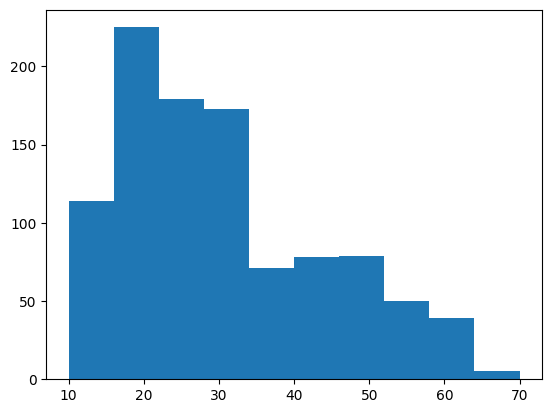

In [ ]:
# univariate analysis
#Age
#1. Histogram
plt.hist(x=data['Age'])

<Axes: ylabel='Age'>

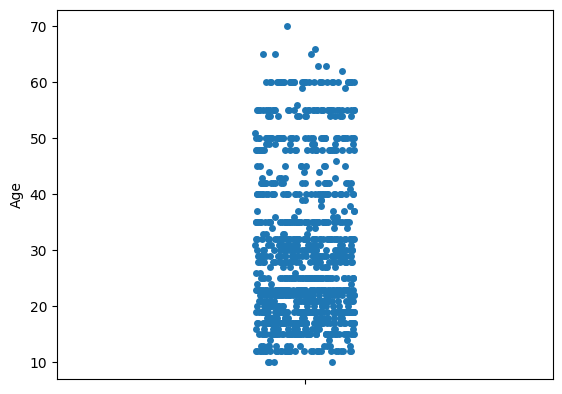

In [ ]:
#strip plot

sns.stripplot(data['Age'])

<Axes: xlabel='Age', ylabel='count'>

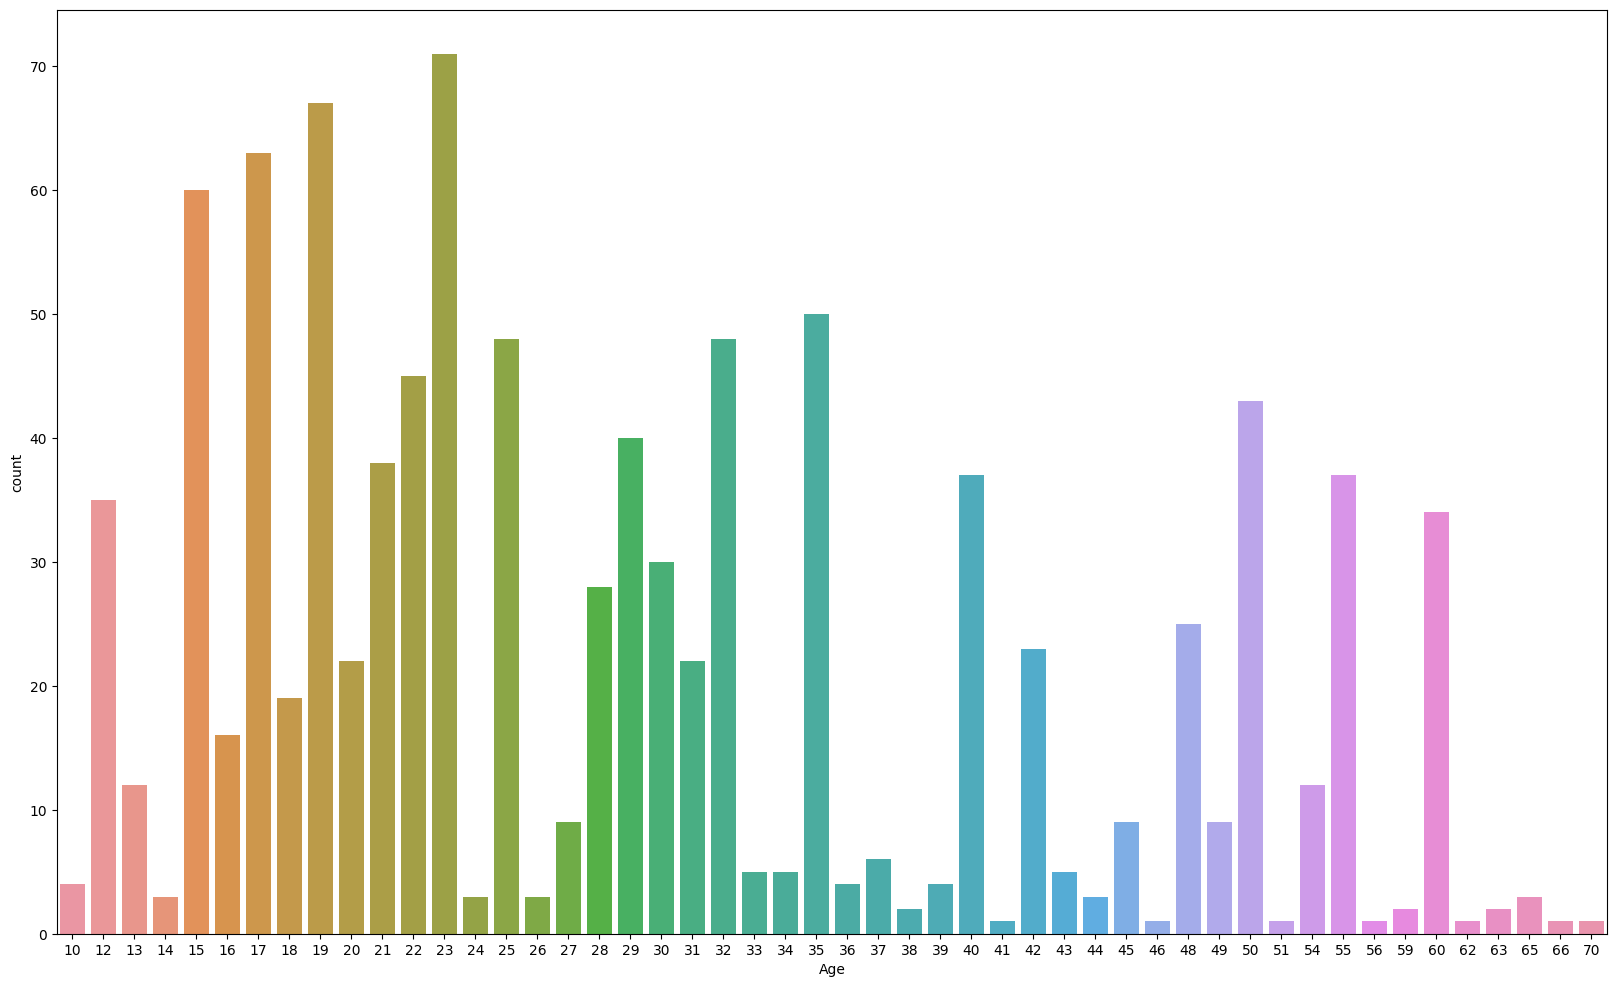

In [ ]:
#count plot
plt.figure(figsize=(20,12))
sns.countplot(x="Age", data=data)

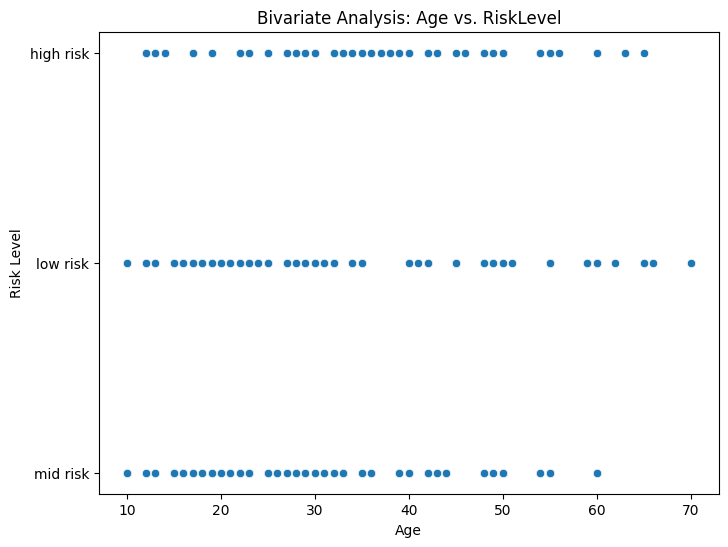

Correlation Coefficient: -0.2082960090732092


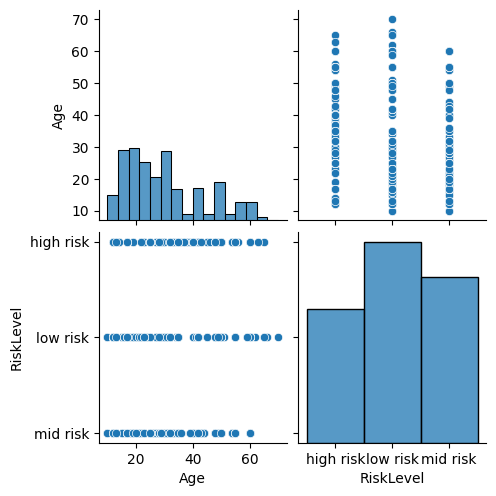

In [ ]:
#bivariate analysis
#age vs risk Level
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='RiskLevel', data=data)
plt.title('Bivariate Analysis: Age vs. RiskLevel')
plt.xlabel('Age')
plt.ylabel('Risk Level')
plt.show()

y = data['RiskLevel']  # Target variable
# Encode the target variable into numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Calculate the correlation between features and the target variable
#correlation_scores = X_train.corrwith(pd.Series(y_train))  # Convert y_train to a pandas Series


correlation_coefficient = data['Age'].corr(pd.Series(y))
print(f'Correlation Coefficient: {correlation_coefficient}')

# You can also create other visualizations, like a pairplot or a jointplot
sns.pairplot(data, vars=['Age', 'RiskLevel'])
plt.show()



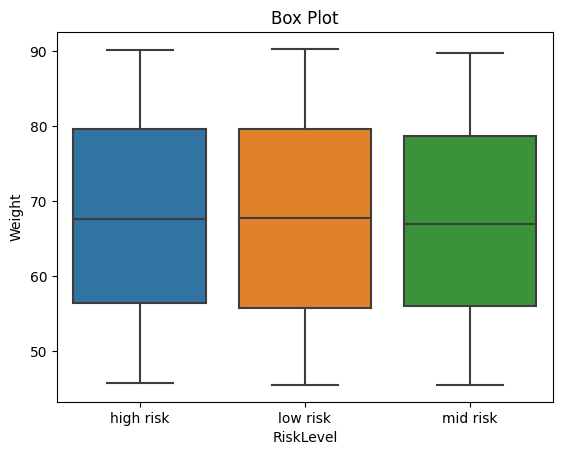

In [ ]:
#Weight Vs RiskLevel
sns.boxplot(x='RiskLevel', y='WeightKG', data=data)
plt.xlabel('RiskLevel')
plt.ylabel('Weight')
plt.title('Box Plot')
plt.show()


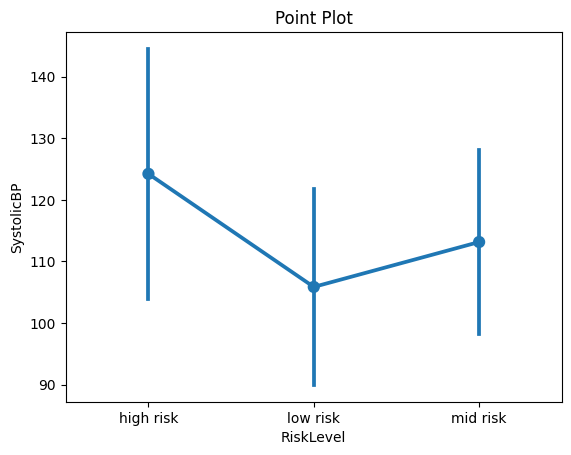

In [ ]:
#SystolicBP vs RiskLevel
sns.pointplot(x='RiskLevel', y='SystolicBP', data=data, errorbar='sd')
plt.xlabel('RiskLevel')
plt.ylabel('SystolicBP')
plt.title('Point Plot')
plt.show()


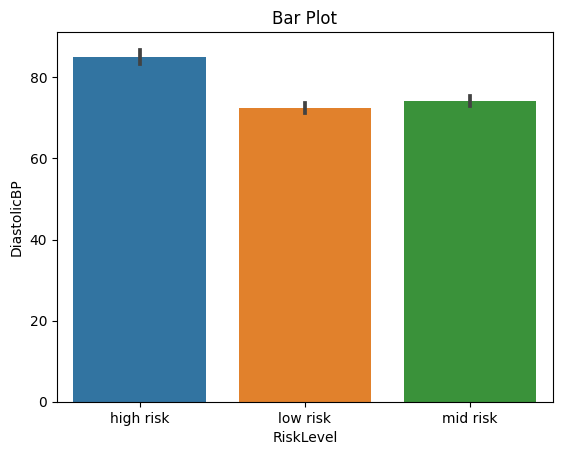

In [ ]:
#DiastolicBP VS RiskLevel
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='RiskLevel', y='DiastolicBP', data=data)
plt.xlabel('RiskLevel')
plt.ylabel('DiastolicBP')
plt.title('Bar Plot')
plt.show()


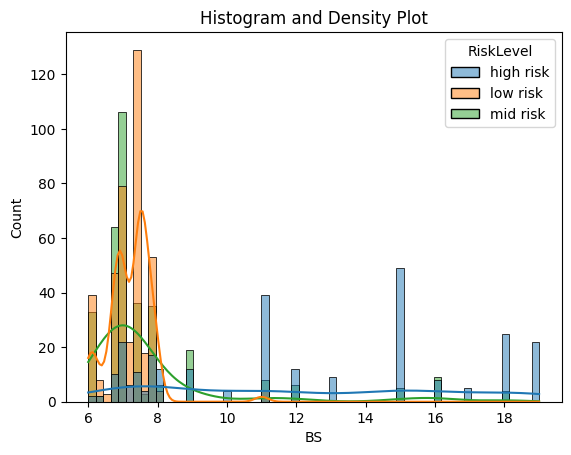

In [ ]:
#BS vs RiskLevel
sns.histplot(data, x='BS', hue='RiskLevel', kde=True)
plt.xlabel('BS')
plt.title('Histogram and Density Plot')
plt.show()


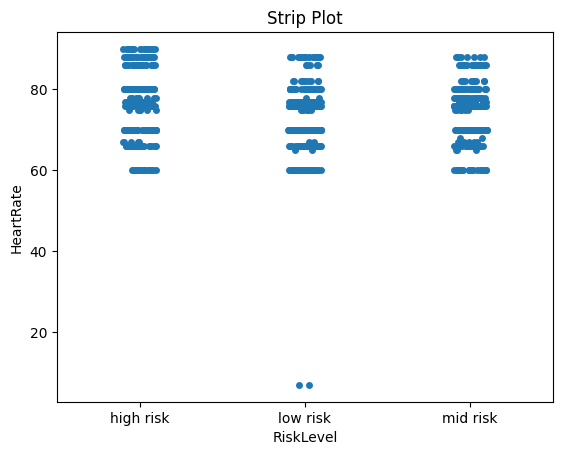

In [ ]:
#Heart Rate vs RiskLevel
sns.stripplot(x='RiskLevel', y='HeartRate', data=data)
plt.xlabel('RiskLevel')
plt.ylabel('HeartRate')
plt.title('Strip Plot')
plt.show()


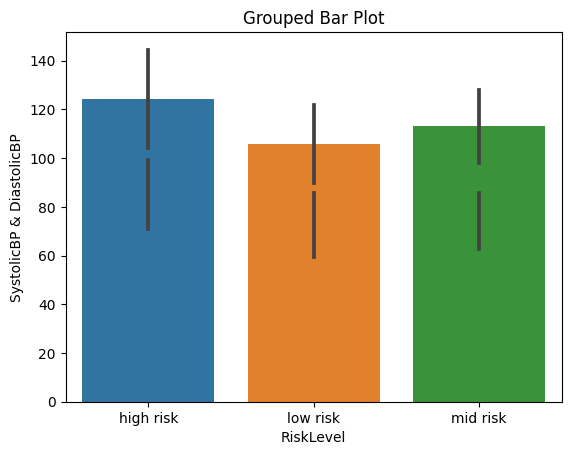

In [ ]:
#Trivariate Analysis
sns.barplot(x='RiskLevel', y='SystolicBP', data=data, errorbar='sd')
sns.barplot(x='RiskLevel', y='DiastolicBP', data=data, errorbar='sd', alpha=0.5)
plt.xlabel('RiskLevel')
plt.ylabel('SystolicBP & DiastolicBP')
plt.title('Grouped Bar Plot')
plt.show()


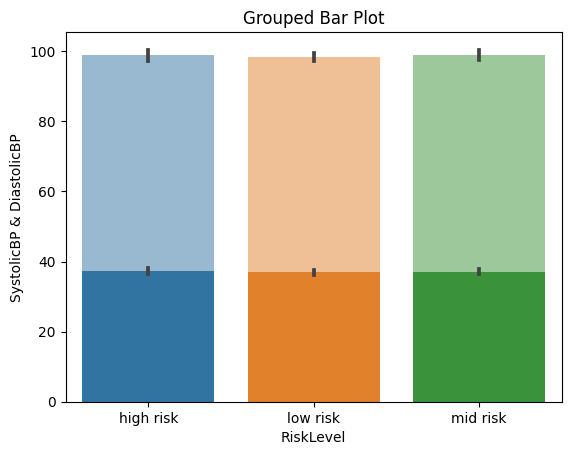

In [ ]:
#BodyTemp_C vs BodyTemp_F
sns.barplot(x='RiskLevel', y='BodyTemp_C', data=data, errorbar='sd')
sns.barplot(x='RiskLevel', y='BodyTemp_F', data=data, errorbar='sd', alpha=0.5)
plt.xlabel('RiskLevel')
plt.ylabel('SystolicBP & DiastolicBP')
plt.title('Grouped Bar Plot')
plt.show()

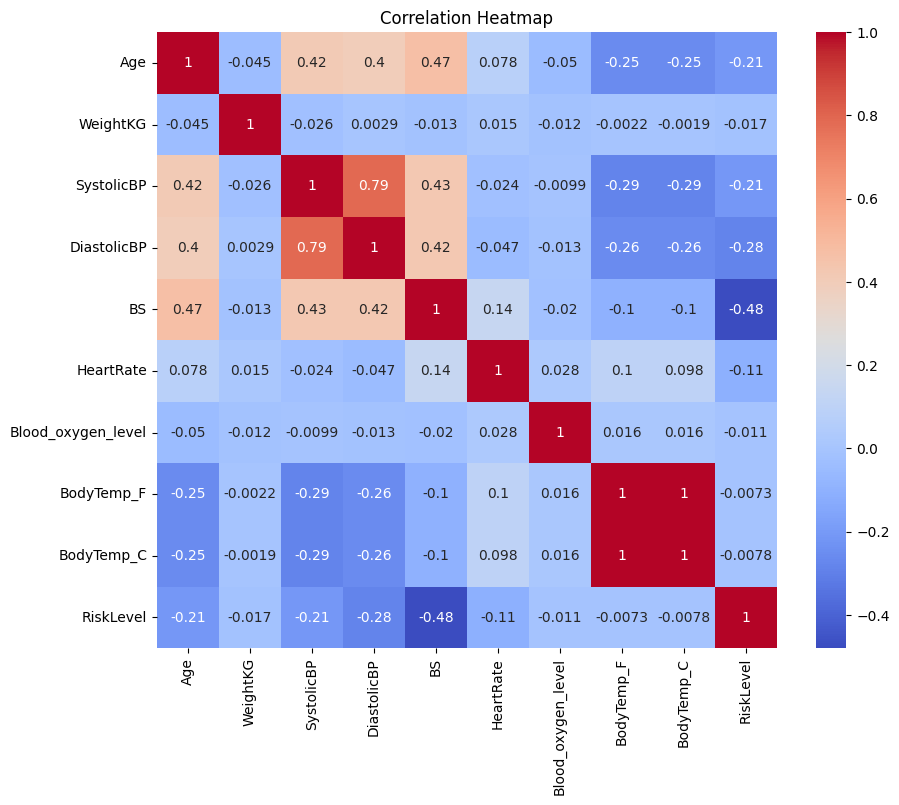

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Iterate through the DataFrame and apply label encoding to non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Now, you can calculate the correlation matrix and create a heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **OBSERVATIONS:**

**Strong Positive Correlations:**
There is a strong positive correlation between SystolicBP and DiastolicBP (0.79), which is expected as they are both blood pressure measurements.
Age has a moderately positive correlation with both SystolicBP (0.42) and DiastolicBP (0.4).
BS (possibly blood sugar) shows a moderate positive correlation with Age (0.47) and SystolicBP (0.43).

**Strong Negative Correlations:**
RiskLevel has a moderate negative correlation with BS (-0.48), suggesting that as blood sugar increases, the risk level decreases, which might be counterintuitive and warrants further investigation.
There are also negative correlations between BodyTemp_F (and BodyTemp_C, which are likely Fahrenheit and Celsius temperatures) with SystolicBP, DiastolicBP, and RiskLevel, though these correlations are weaker (around -0.25 to -0.3).

**Weak or No Correlations:**
HeartRate does not show a strong correlation with any other variables, with all values close to 0.
Blood_oxygen_level is also not strongly correlated with the other variables, which suggests it varies independently of factors like Age, WeightKG, or BS.
WeightKG shows little to no correlation with any other variables in the dataset.

**Duplicate Information:**
BodyTemp_F and BodyTemp_C are perfectly correlated (1.0), which is expected as they are the same measurement in different units. Only one of them would be needed for further analysis.

**Potential Data Issues:**
The negative correlation between RiskLevel and BS could indicate an issue with the data or with the way risk is being assessed.
Since BodyTemp_F and BodyTemp_C are identical measures, including both in a predictive model would be redundant.



# II.  Outlier Detection and Handling Methods


Outlier detection is a crucial step in data preprocessing, especially in statistical analyses and machine learning, where outliers can skew results significantly. One common method for outlier detection is the use of z-scores. A z-score measures the number of standard deviations a data point is from the mean of the data set. By converting data points into z-scores, it becomes easier to identify outliers. Typically, a threshold is set (like 2 or 3 standard deviations), and any data point with a z-score beyond this threshold is flagged as an outlier. This method is effective in datasets that are close to normally distributed, as it relies on the properties of the standard deviation and mean in a normal distribution.

Once outliers are identified, they need to be handled appropriately to ensure they don't adversely affect the analysis. One common approach is to replace outliers with the mean value of the dataset. This method involves calculating the mean of the non-outlier values and then substituting the outlier values with this mean. This technique is particularly useful when the number of outliers is relatively small, as it minimally affects the overall distribution of the data. However, if the dataset has a significant number of outliers, or if the outliers are very extreme, replacing them with the mean could still skew the data. In such cases, other methods like median replacement or trimming the dataset may be more appropriate. The choice of method largely depends on the nature of the data and the specific requirements of the analysis being performed.

## Applying Outlier Detection and Handling Methods:



In [ ]:
# Define a function to identify outliers using Z-score
def find_outliers_z_score(df, column_name, threshold=3):
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    return z_scores > threshold

# Set the Z-score threshold for identifying outliers (adjust as needed)
z_score_threshold = 4

# Specify the column you want to check for outliers
column_to_check = "Blood_oxygen_level"

# Check for outliers in the specified column
outliers = find_outliers_z_score(data, column_to_check, z_score_threshold)

# Print outliers
print("Outliers in", column_to_check, ":")
print(data[outliers])


Outliers in Blood_oxygen_level :
Empty DataFrame
Columns: [Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C, RiskLevel]
Index: []


In [ ]:
# Define a function to replace outliers with the column mean
def replace_outliers_with_mean(df, column_name, threshold=3):
    mean = df[column_name].mean()
    std = df[column_name].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    df[column_name] = df[column_name].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

# Set the threshold for identifying outliers
threshold = 4

# Specify the columns you want to process
columns_to_process = ['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level', 'BodyTemp_F', 'BodyTemp_C']

# Iterate through the specified columns and replace outliers with the mean
for column in columns_to_process:
    replace_outliers_with_mean(data, column, threshold)



# III. Preparation of Learning Data

## Split the Data:
Divide the dataset into learning, training and testing datasets.

In [ ]:
X = data.drop('RiskLevel', axis=1)  # Features
y = data['RiskLevel']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IV. Feature Selection

## Feature Selection Methods:


Optimizing machine learning models for a specific project involves a crucial step: feature selection. Here's a concise overview of selected feature selection methods tailored for our project:

**1) Chi-Square**: Chi-Square is a statistical method used to assess the independence between categorical variables, making it a valuable tool for filter methods in feature selection. It measures the statistical significance of the association between features and the target variable.

**2) Correlation**: Correlation analysis evaluates the linear relationship between continuous variables, primarily employed in filter methods. It identifies and retains features with meaningful correlations, indicating their relevance without involving a specific machine learning algorithm.

**3) Information Gain**: Information Gain, rooted in information theory and commonly used in decision tree algorithms, is a filter method. It quantifies a feature's effectiveness in reducing uncertainty about the target variable, aiding in the selection of features with higher information gain.

**4) Threshold**: The threshold method, setting specific criteria for feature selection, is a filter technique. It filters out features with limited variability, focusing on those above a certain threshold level. This ensures that only features carrying meaningful information are retained.

**5) Classif_score**: Classif_score, or classification score, is a wrapper method that evaluates the discriminatory power of features within the context of specific machine learning algorithms. It aids in the selection of features based on their impact on classification tasks.

**6) Principal Component Analysis (PCA)**: PCA, a dimensionality reduction technique, serves as an embedded method. It transforms features into uncorrelated variables, directly influencing model training. By capturing significant variability, it aids in selecting essential features within the model learning process.

**7)Feature Importance**: Feature importance methods, often associated with tree-based models, are embedded techniques. They assign importance scores to features based on their contribution to model performance, directly influencing the learning process.

**8)**Embedding**: Embedding methods, such as autoencoders or word embeddings, are inherently embedded. They transform high-dimensional data into lower-dimensional representations, influencing the feature extraction process within the model training phase.

**9) Forward Selection**: Forward selection is a feature selection technique that belongs to the family of wrapper methods. It is commonly used in the context of building predictive models. The process begins with an empty set of features, and at each step, the algorithm selects the most relevant feature to add to the set based on some criterion, often the performance of a chosen machine learning model.

These diverse methods provide a comprehensive toolkit for feature selection, allowing us to tailor our approach based on the characteristics of the Maternal Health Continuous Risk Assessment dataset and the specific requirements of our predictive modeling goals.

## Apply Feature Selection Methods:

Implement the chosen feature selection methods on the training data. This involves ranking or scoring features based on their relevance to the target variable.
**Note**: The Feature Selection methods are implemented along with the models in their respective cells.


In [ ]:
#chi2
from sklearn.feature_selection import SelectKBest, chi2
num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

In [ ]:
#f_classif
from sklearn.feature_selection import SelectKBest, chi2,f_classif
num_features_to_select_with_fclassif = 5  # Set the desired number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select_with_fclassif)
# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
# Get the names of the selected features
selected_feature_names1 = X.columns[selector.get_support()]

In [ ]:
#With correlation

# Assuming 'y_train' is a pandas Series
y_train_numeric = pd.to_numeric(y_train, errors='coerce')

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Calculate the correlation between features and the target variable
correlation_scores = X_train_df.corrwith(y_train_numeric)

# Select the features with the highest absolute correlation values
num_features_to_select = 5
selected_features = correlation_scores.abs().nlargest(num_features_to_select).index

# Subset the training and testing data based on selected features
X_train_selected = X_train_df[selected_features]



In [ ]:
#with PCA
from sklearn.decomposition import PCA

# Create a PCA model to reduce dimensionality
pca = PCA(n_components=5)  # You can adjust the number of components as needed

# Fit and transform the training data with PCA
X_train_pca = pca.fit_transform(X_train)

# Transform the test data with the same PCA model
X_test_pca = pca.transform(X_test)

In [ ]:
#with Information Gain
# Perform information gain feature selection
num_features_to_select = 5  # Set the desired number of features
info_gain_scores = mutual_info_classif(X_train, y_train)
selected_feature_indices = (-info_gain_scores).argsort()[:num_features_to_select]
selected_features = X.columns[selected_feature_indices]


## Evaluate Models Performance:

Train your machine learning models using the selected features and evaluate their performance on the testing set. Measure metrics such as accuracy, precision, recall, and F1 score.

Random Forest without any feature selection

In [ ]:
# Create a Random Forest model
rf_model_wf = RandomForestClassifier()
rf_model_wf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model_wf.predict(X_test)

# Evaluate the model
accuracy_wf = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1_wf = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy_wf}")
print(f" F1: {f1_wf}")

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7931034482758621
 F1: 0.7940432003138513
Confusion Matrix:
 [[45  1  4]
 [ 3 66 19]
 [ 5 10 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        50
           1       0.86      0.75      0.80        88
           2       0.68      0.77      0.72        65

    accuracy                           0.79       203
   macro avg       0.80      0.81      0.80       203
weighted avg       0.80      0.79      0.79       203



Random forest with Feature Selection
1. With chi2
2. with f_classif
3. With Threshold
4. With correlation
5. With Information Gain
6. With PCA
7. With Feature Importance
8. RFE
9. Forward feature Selection

In [ ]:

#with Chi2

num_features_to_select_chi2 = 5  # Set the desired number of features
selector = SelectKBest(score_func=chi2, k=num_features_to_select_chi2)
# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]
# Create a Random Forest model
rf_model_chi2 = RandomForestClassifier()
rf_model_chi2.fit(X_train_selected, y_train)
# Make predictions on the test set
y_pred = rf_model_chi2.predict(X_test_selected)
# Evaluate the model
accuracy_chi2= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Calculate the F1-score
f1_chi2 = f1_score(y_test, y_pred, average='weighted')
print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_chi2}")
print(f" F1: {f1_chi2}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.7881773399014779
 F1: 0.7885601653655614
Confusion Matrix:
 [[44  2  4]
 [ 5 66 17]
 [ 5 10 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85        50
           1       0.85      0.75      0.80        88
           2       0.70      0.77      0.74        65

    accuracy                           0.79       203
   macro avg       0.79      0.80      0.79       203
weighted avg       0.79      0.79      0.79       203



In [ ]:

#with classif score
num_features_to_select_classif = 5  # Set the desired number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select_classif)
# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]
# Create a Random Forest model
rf_model_classif = RandomForestClassifier()
rf_model_classif.fit(X_train_selected, y_train)
# Make predictions on the test set
y_pred = rf_model_classif.predict(X_test_selected)
# Evaluate the model
accuracy_classif = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Calculate the F1-score
f1_classif = f1_score(y_test, y_pred, average='weighted')
print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_classif}")
print(f" F1: {f1_classif}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.7931034482758621
 F1: 0.7936674199196222
Confusion Matrix:
 [[45  1  4]
 [ 4 66 18]
 [ 5 10 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.86      0.75      0.80        88
           2       0.69      0.77      0.73        65

    accuracy                           0.79       203
   macro avg       0.79      0.81      0.80       203
weighted avg       0.80      0.79      0.79       203



In [ ]:
#with threshold(selectKmodel)

# Create a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

best_threshold = None
best_n_features = 0
best_rf_model = None

# Initialize a default model outside the loop
default_rf_model = RandomForestClassifier()

# Initialize an empty list to store the names of selected features
selected_feature_names = []

# Iterate through different threshold values
for threshold in [0.05, 0.1, 0.2]:
    sfm = SelectFromModel(rf_model, threshold=threshold)
    sfm.fit(X_train, y_train)
    X_train_selected = sfm.transform(X_train)

    # Check if features were selected
    if X_train_selected.shape[1] > best_n_features:
        best_n_features = X_train_selected.shape[1]
        best_threshold = threshold
        best_rf_model = RandomForestClassifier()
        best_rf_model.fit(X_train_selected, y_train)

        # Update the selected_feature_names list with the names of selected features
        selected_feature_names = [X.columns[i] for i, selected in enumerate(sfm.get_support()) if selected]

# Make predictions on the test set using the model with selected features if features were selected
if best_rf_model is not None:
    X_test_selected = SelectFromModel(rf_model, threshold=best_threshold).transform(X_test)
    y_pred = best_rf_model.predict(X_test_selected)

    # Evaluate the model
    accuracy_rf_threshold = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    # Calculate the F1-score
    f1_rf_threshold = f1_score(y_test, y_pred, average='weighted')

    print(f"Best Threshold: {best_threshold}")
    print(f"Number of Selected Features: {best_n_features}")
    print("Selected Features:", selected_feature_names)  # Print the names of the selected features
    print(f"Accuracy: {accuracy_rf_threshold}")
    print(f"F1: {f1_rf_threshold}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_rep)
else:
    print("No features were selected.")


Best Threshold: 0.05
Number of Selected Features: 7
Selected Features: ['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level']
Accuracy: 0.7832512315270936
F1: 0.7822140549892672
Confusion Matrix:
 [[43  1  6]
 [ 4 72 12]
 [ 5 16 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        50
           1       0.81      0.82      0.81        88
           2       0.71      0.68      0.69        65

    accuracy                           0.78       203
   macro avg       0.78      0.79      0.78       203
weighted avg       0.78      0.78      0.78       203



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:

#with correlation values

# Encode the target variable into numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the correlation between features and the target variable
correlation_scores = X_train.corrwith(pd.Series(y_train))  # Convert y_train to a pandas Series

# Select the features with the highest absolute correlation values
# You can choose a threshold to determine which features to select
threshold = 0.04 # Adjust the threshold as needed
selected_feature_names = correlation_scores[abs(correlation_scores) >= threshold].index

# Create a new DataFrame with the selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Create a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model
accuracy_rf_corr = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1_rf_corr = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Selected Features:", selected_feature_names)
print(f"Number of Selected Features: {len(selected_feature_names)}")
print(f"Accuracy: {accuracy_rf_corr}")
print(f"F1 Score: {f1_rf_corr}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)



Selected Features: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate'], dtype='object')
Number of Selected Features: 5
Accuracy: 0.7931034482758621
F1 Score: 0.7937183985843683
Confusion Matrix:
 [[44  2  4]
 [ 5 65 18]
 [ 5  8 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85        50
           1       0.87      0.74      0.80        88
           2       0.70      0.80      0.75        65

    accuracy                           0.79       203
   macro avg       0.79      0.81      0.80       203
weighted avg       0.80      0.79      0.79       203



In [ ]:
#information gain


# Perform information gain feature selection
num_features_to_select = 5  # Set the desired number of features
info_gain_scores = mutual_info_classif(X_train, y_train)
selected_feature_indices = (-info_gain_scores).argsort()[:num_features_to_select]
selected_features = X.columns[selected_feature_indices]

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model
accuracy_rf_ig = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1_rf_ig = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Accuracy: {accuracy_rf_ig}")
print(f"F1 Score: {f1_rf_ig}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: BS, SystolicBP, Age, DiastolicBP, HeartRate
Accuracy: 0.7980295566502463
F1 Score: 0.797908295501595
Confusion Matrix:
 [[45  2  3]
 [ 5 67 16]
 [ 5 10 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        50
           1       0.85      0.76      0.80        88
           2       0.72      0.77      0.75        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.80       203
weighted avg       0.80      0.80      0.80       203



In [ ]:
#PCA


# Create a PCA model to reduce dimensionality
pca = PCA(n_components=5)  # You can adjust the number of components as needed

# Fit and transform the training data with PCA
X_train_pca = pca.fit_transform(X_train)

# Transform the test data with the same PCA model
X_test_pca = pca.transform(X_test)

# Create a Random Forest model and fit it on the PCA-transformed training data
rf_model = RandomForestClassifier()
rf_model.fit(X_train_pca, y_train)

# Make predictions on the test set using the model with PCA-transformed features
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
accuracy_rf_pca = accuracy_score(y_test, y_pred)
f1_rf_pca = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Number of Selected Features (Principal Components): {pca.n_components_}")
print(f"Accuracy: {accuracy_rf_pca}")
print(f"F1 Score: {f1_rf_pca}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Number of Selected Features (Principal Components): 5
Accuracy: 0.6502463054187192
F1 Score: 0.6510531937874889
Confusion Matrix:
 [[34  9  7]
 [ 9 57 22]
 [ 5 19 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.69        50
           1       0.67      0.65      0.66        88
           2       0.59      0.63      0.61        65

    accuracy                           0.65       203
   macro avg       0.65      0.65      0.65       203
weighted avg       0.65      0.65      0.65       203



In [ ]:
#feature importance
# Create a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_feature_indices = feature_importances.argsort()[::-1]

# Select the top 'k' features based on importance
k = 5  # Adjust the number of features you want to select
selected_feature_indices = sorted_feature_indices[:k]

# Create a new dataset with selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Retrain the Random Forest model with the selected features
rf_model_selected = RandomForestClassifier()
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features
y_pred = rf_model_selected.predict(X_test_selected)

# Evaluate the model
accuracy_rf_fi = accuracy_score(y_test, y_pred)
f1_rf_fi = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Selected Features: {X_train.columns[selected_feature_indices]}")
print(f"Accuracy: {accuracy_rf_fi}")
print(f"F1 Score: {f1_rf_fi}")

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Selected Features: Index(['BS', 'SystolicBP', 'WeightKG', 'Age', 'DiastolicBP'], dtype='object')
Accuracy: 0.7733990147783252
F1 Score: 0.7736883016969643
Confusion Matrix:
 [[44  2  4]
 [ 3 67 18]
 [ 5 14 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        50
           1       0.81      0.76      0.78        88
           2       0.68      0.71      0.69        65

    accuracy                           0.77       203
   macro avg       0.78      0.78      0.78       203
weighted avg       0.77      0.77      0.77       203



In [ ]:

#RFE




# Set the desired number of features
num_features_to_select = 5

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create RFE model and select features
rfe = RFE(estimator=rf_model, n_features_to_select=num_features_to_select)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[rfe.support_]

# Fit the Random Forest model on the selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model
accuracy_rf_rfe = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_rf_rfe = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_rf_rfe}")
print(f"F1: {f1_rf_rfe}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, WeightKG, SystolicBP, DiastolicBP, BS
Accuracy: 0.7733990147783252
F1: 0.7736883016969643
Confusion Matrix:
 [[44  2  4]
 [ 3 67 18]
 [ 5 14 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        50
           1       0.81      0.76      0.78        88
           2       0.68      0.71      0.69        65

    accuracy                           0.77       203
   macro avg       0.78      0.78      0.78       203
weighted avg       0.77      0.77      0.77       203



In [ ]:
#Foward Selection


# Set the desired number of features
num_features_to_select = 5

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Forward feature selection
sfs = SequentialFeatureSelector(rf_model, k_features=num_features_to_select, forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]

# Fit the Random Forest model on the selected features
rf_model.fit(X_train[selected_feature_names], y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test[selected_feature_names])

# Evaluate the model
accuracy_rf_fs = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_rf_fs = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_rf_fs}")
print(f"F1: {f1_rf_fs}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_F
Accuracy: 0.7980295566502463
F1: 0.7987654525129473
Confusion Matrix:
 [[45  1  4]
 [ 4 67 17]
 [ 7  8 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.88      0.76      0.82        88
           2       0.70      0.77      0.74        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.80       203
weighted avg       0.81      0.80      0.80       203



In [ ]:


# Set the desired number of features
num_features_to_select = 5

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Forward feature selection with cross-validation
sfs = SequentialFeatureSelector(rf_model, k_features=num_features_to_select, forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]

# Hyperparameter tuning using grid search with cross-validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train[selected_feature_names], y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Fit the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train[selected_feature_names], y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test[selected_feature_names])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_F
Accuracy: 0.8029556650246306
F1: 0.8036172988677869
Confusion Matrix:
 [[45  1  4]
 [ 4 68 16]
 [ 7  8 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.88      0.77      0.82        88
           2       0.71      0.77      0.74        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.80       203
weighted avg       0.81      0.80      0.80       203



SVM Without Feature Selection

In [ ]:
#SVM without Feature Selection


# Create an SVM model (you can adjust the kernel and other hyperparameters)
svm_model = SVC(kernel='linear')  # Use a linear kernel for example

svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred, average='weighted')  # Calculate the F1-score
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_svm}")
print(f"F1 Score: {f1_svm}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6847290640394089
F1 Score: 0.6623095341545394
Confusion Matrix:
 [[43  1  6]
 [ 3 74 11]
 [12 31 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.80        50
           1       0.70      0.84      0.76        88
           2       0.56      0.34      0.42        65

    accuracy                           0.68       203
   macro avg       0.67      0.68      0.66       203
weighted avg       0.67      0.68      0.66       203



SVM with Feature Selection
1. With classif
2. With chi2
3. With Information gain
4. With Feature Importance
5. With PCA
6. With Correlation
7. With Threshold
8. RFE
9. Forward selection

In [ ]:
#with classif




num_features_to_select = 5 # Set the desired number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create an SVM model (you can adjust the kernel and other hyperparameters)
svm_model = SVC(kernel='linear')  # Use a linear kernel for example

svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_selected)

# Evaluate the model
accuracy_svm_classif = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_svm_classif = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_svm_classif}")
print(f"F1 Score: {f1_svm_classif}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.6551724137931034
F1 Score: 0.610418698445076
Confusion Matrix:
 [[42  5  3]
 [ 2 78  8]
 [ 9 43 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        50
           1       0.62      0.89      0.73        88
           2       0.54      0.20      0.29        65

    accuracy                           0.66       203
   macro avg       0.65      0.64      0.61       203
weighted avg       0.64      0.66      0.61       203



In [ ]:
#with chi2




num_features_to_select = 5 # Set the desired number of features
selector = SelectKBest(score_func=chi2, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create an SVM model (you can adjust the kernel and other hyperparameters)
svm_model = SVC(kernel='linear')  # Use a linear kernel for example

svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_selected)

# Evaluate the model
accuracy_svm_chi2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_svm_chi2 = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_svm_chi2}")
print(f"F1 Score: {f1_svm_chi2}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.6551724137931034
F1 Score: 0.610418698445076
Confusion Matrix:
 [[42  5  3]
 [ 2 78  8]
 [ 9 43 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        50
           1       0.62      0.89      0.73        88
           2       0.54      0.20      0.29        65

    accuracy                           0.66       203
   macro avg       0.65      0.64      0.61       203
weighted avg       0.64      0.66      0.61       203



In [ ]:
#information gain



num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=mutual_info_classif, k=min(num_features_to_select, X_train.shape[1]))

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the top k features based on mutual information
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create an SVM model (you can adjust the kernel and other hyperparameters)
svm_model = SVC(kernel='linear')  # Use a linear kernel for example

# Train the model on the selected features
svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_selected)

# Evaluate the model
accuracy_svm_ig = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_svm_ig = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_svm_ig}")
print(f"F1 Score: {f1_svm_ig}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.6551724137931034
F1 Score: 0.610418698445076
Confusion Matrix:
 [[42  5  3]
 [ 2 78  8]
 [ 9 43 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        50
           1       0.62      0.89      0.73        88
           2       0.54      0.20      0.29        65

    accuracy                           0.66       203
   macro avg       0.65      0.64      0.61       203
weighted avg       0.64      0.66      0.61       203



In [ ]:

#Feature Importance



# Create an SVM model (you can adjust the kernel and other hyperparameters)
svm_model = SVC(kernel='linear')  # Use a linear kernel for example

# Train the model
svm_model.fit(X_train, y_train)

# Get feature importances from the SVM model (coefficients)
feature_importances = svm_model.coef_.flatten()

# Print the shape of the DataFrame and feature importances for debugging
print("X shape:", X.shape)
print("Feature importances shape:", feature_importances.shape)

# Select the top features based on importance scores
num_features_to_select = 5
selected_features_indices = feature_importances.argsort()[-num_features_to_select:][::-1]

# Print the selected feature indices for debugging
print("Selected feature indices:", selected_features_indices)

# Make sure the number of features is less than or equal to the actual number of features
selected_features_indices = selected_features_indices[selected_features_indices < X.shape[1]]

# Select the top features
selected_features = X.columns[selected_features_indices]

# Print the selected features for debugging
print("Selected Feature Names:", ', '.join(selected_features))

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the SVM model only on the selected features
svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = svm_model.predict(X_test_selected)

# Evaluate the model
accuracy_svm_fi = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_svm_fi = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Feature Importances: {', '.join(map(str, feature_importances))}")
print(f"Accuracy: {accuracy_svm_fi}")
print(f"F1 Score: {f1_svm_fi}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


X shape: (1013, 9)
Feature importances shape: (27,)
Selected feature indices: [ 4  7  8 17 13]
Selected Feature Names: BS, BodyTemp_F, BodyTemp_C
Selected Feature Names: BS, BodyTemp_F, BodyTemp_C
Feature Importances: 0.0015824681579488242, -0.002744954225818219, 0.0787565352202364, 0.010549962938966928, 0.7638400432639401, 0.01932868326366588, 0.02619818991752254, 0.6833033283637633, 0.3172874367323857, -0.004372646830233862, 0.002375676813244354, 0.008894177813999704, 0.0390844185185415, 0.28632365748671873, 0.044067916731364676, -0.012350219982181443, 0.09015959405405738, 0.3147517834941027, -0.005014054038838367, 0.000990905902654049, -0.06012315840416704, 0.05241722231221502, -0.21957442088796597, -0.021784859633044107, 0.012386323374812491, -0.5850702525422093, 0.23606966373972682
Accuracy: 0.6699507389162561
F1 Score: 0.6388827109447094
Confusion Matrix:
 [[40  6  4]
 [ 2 78  8]
 [ 8 39 18]]
Classification Report:
               precision    recall  f1-score   support

         

In [ ]:
#with PCA



# Apply PCA to reduce dimensionality
num_components = 6  # Set the desired number of components
pca = PCA(n_components=num_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create an SVM model (you can adjust the kernel and other hyperparameters)
svm_model = SVC(kernel='linear')  # Use a linear kernel for example

# Train the SVM model on the reduced feature space
svm_model.fit(X_train_pca, y_train)

# Make predictions on the test set using the reduced feature space
y_pred = svm_model.predict(X_test_pca)

# Evaluate the model
accuracy_svm_pca = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_svm_pca = f1_score(y_test, y_pred, average='weighted')

print(f"Number of Components after PCA: {num_components}")
print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}")
print(f"Accuracy: {accuracy_svm_pca}")
print(f"F1 Score: {f1_svm_pca}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Number of Components after PCA: 6
Explained Variance Ratio: 0.9903573258302795
Accuracy: 0.5615763546798029
F1 Score: 0.5391257187700922
Confusion Matrix:
 [[28 17  5]
 [11 68  9]
 [ 8 39 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58        50
           1       0.55      0.77      0.64        88
           2       0.56      0.28      0.37        65

    accuracy                           0.56       203
   macro avg       0.57      0.54      0.53       203
weighted avg       0.56      0.56      0.54       203



In [ ]:
#correlation




# Calculate correlation between features and target variable
correlations = [pearsonr(X.iloc[:, i], y)[0] for i in range(X.shape[1])]

# Select the top features based on correlation scores
num_features_to_select = 5
selected_features_indices = sorted(range(len(correlations)), key=lambda i: abs(correlations[i]), reverse=True)[:num_features_to_select]
selected_features = X.columns[selected_features_indices]

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create an SVM model (you can adjust the kernel and other hyperparameters)
svm_model = SVC(kernel='linear')  # Use a linear kernel for example

# Train the SVM model only on the selected features
svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = svm_model.predict(X_test_selected)

# Evaluate the model
accuracy_svm_corr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_svm_corr = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Accuracy: {accuracy_svm_corr}")
print(f"F1 Score: {f1_svm_corr}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: BS, DiastolicBP, Age, SystolicBP, HeartRate
Accuracy: 0.6551724137931034
F1 Score: 0.610418698445076
Confusion Matrix:
 [[42  5  3]
 [ 2 78  8]
 [ 9 43 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        50
           1       0.62      0.89      0.73        88
           2       0.54      0.20      0.29        65

    accuracy                           0.66       203
   macro avg       0.65      0.64      0.61       203
weighted avg       0.64      0.66      0.61       203



In [ ]:
#With Threhold




# Create an SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for SelectFromModel compatibility
svm_model.fit(X_train, y_train)

best_threshold = None
best_n_features = 0
best_svm_model = None

# Initialize a default model outside the loop
default_svm_model = SVC(kernel='linear')

# Initialize an empty list to store the names of selected features
selected_feature_names = []

# Iterate through different threshold values
for threshold in [0.05, 0.1, 0.2]:
    sfm = SelectFromModel(svm_model, threshold=threshold)
    sfm.fit(X_train, y_train)
    X_train_selected = sfm.transform(X_train)

    # Check if features were selected
    if X_train_selected.shape[1] > best_n_features:
        best_n_features = X_train_selected.shape[1]
        best_threshold = threshold
        best_svm_model = SVC(kernel='linear')  # SVM with linear kernel
        best_svm_model.fit(X_train_selected, y_train)

        # Update the selected_feature_names list with the names of selected features
        selected_feature_names = [X.columns[i] for i, selected in enumerate(sfm.get_support()) if selected]

# Make predictions on the test set using the model with selected features if features were selected
if best_svm_model is not None:
    X_test_selected = SelectFromModel(svm_model, threshold=best_threshold).transform(X_test)
    y_pred = best_svm_model.predict(X_test_selected)

    # Evaluate the model
    accuracy_svm_threshold = accuracy_score(y_test, y_pred)
    # Calculate the F1-score
    f1_svm_threshold = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Best Threshold: {best_threshold}")
    print(f"Number of Selected Features: {best_n_features}")
    print("Selected Features:", selected_feature_names)  # Print the names of the selected features
    print(f"Accuracy: {accuracy_svm_threshold}")
    print(f"F1 Score: {f1_svm_threshold}")

    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_rep)
else:
    print("No features were selected.")


Best Threshold: 0.05
Number of Selected Features: 7
Selected Features: ['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level', 'BodyTemp_F', 'BodyTemp_C']
Accuracy: 0.6650246305418719
F1 Score: 0.6460980379296214
Confusion Matrix:
 [[42  1  7]
 [ 3 71 14]
 [12 31 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79        50
           1       0.69      0.81      0.74        88
           2       0.51      0.34      0.41        65

    accuracy                           0.67       203
   macro avg       0.65      0.66      0.65       203
weighted avg       0.64      0.67      0.65       203



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
#RFE



# Set the desired number of features
num_features_to_select = 5

# Create an SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for RFE compatibility

# Create RFE model and select features
rfe = RFE(estimator=svm_model, n_features_to_select=num_features_to_select)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[rfe.support_]

# Fit the SVM model on the selected features
svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_selected)

# Evaluate the model
accuracy_svm_rfe = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_svm_rfe = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_svm_rfe}")
print(f"F1: {f1_svm_rfe}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: SystolicBP, DiastolicBP, BS, BodyTemp_F, BodyTemp_C
Accuracy: 0.645320197044335
F1: 0.6335315313668158
Confusion Matrix:
 [[39  1 10]
 [ 1 69 18]
 [12 30 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        50
           1       0.69      0.78      0.73        88
           2       0.45      0.35      0.40        65

    accuracy                           0.65       203
   macro avg       0.63      0.64      0.63       203
weighted avg       0.63      0.65      0.63       203



In [ ]:
#With Forward selection



# Set the desired number of features
num_features_to_select = 5

# Create an SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for SequentialFeatureSelector compatibility

# Forward feature selection
sfs = SequentialFeatureSelector(svm_model, k_features=num_features_to_select, forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]

# Fit the SVM model on the selected features
svm_model.fit(X_train[selected_feature_names], y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test[selected_feature_names])

# Evaluate the model
accuracy_svm_fs = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_svm_fs = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_svm_fs}")
print(f"F1: {f1_svm_fs}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: WeightKG, SystolicBP, DiastolicBP, BS, BodyTemp_C
Accuracy: 0.6699507389162561
F1: 0.6582918769157073
Confusion Matrix:
 [[40  1  9]
 [ 1 71 16]
 [10 30 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        50
           1       0.70      0.81      0.75        88
           2       0.50      0.38      0.43        65

    accuracy                           0.67       203
   macro avg       0.66      0.66      0.66       203
weighted avg       0.66      0.67      0.66       203



Gradient Boosting Without Feature Selection

In [ ]:
#Gradient Boosting without Feature Selection



# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()  # Use default hyperparameters

gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy_gb}")
print(f"F1 Score: {f1_gb}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7783251231527094
F1 Score: 0.7784451244095049
Confusion Matrix:
 [[44  1  5]
 [ 4 68 16]
 [ 7 12 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.84      0.77      0.80        88
           2       0.69      0.71      0.70        65

    accuracy                           0.78       203
   macro avg       0.78      0.79      0.78       203
weighted avg       0.78      0.78      0.78       203



Gradient Boosting with Feature Selection

1. RFE
2. Sequential Forward Selection
3. With f_classif
4. With chi2
5. With information gain
6. With threshold
7. With Correlation
8. With PCA
9. With Feature Importance


In [ ]:
#RFE




# Set the desired number of features
num_features_to_select = 5

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Create RFE model and select features
rfe = RFE(estimator=gb_model, n_features_to_select=num_features_to_select)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[rfe.support_]

# Fit the Gradient Boosting model on the selected features
gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_selected)

# Evaluate the model
accuracy_gb_rfe = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb_rfe = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_gb_rfe}")
print(f"F1: {f1_gb_rfe}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, WeightKG, SystolicBP, BS, BodyTemp_F
Accuracy: 0.7684729064039408
F1: 0.7682830563854555
Confusion Matrix:
 [[43  1  6]
 [ 2 70 16]
 [ 7 15 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        50
           1       0.81      0.80      0.80        88
           2       0.66      0.66      0.66        65

    accuracy                           0.77       203
   macro avg       0.77      0.77      0.77       203
weighted avg       0.77      0.77      0.77       203



In [ ]:
#Sequential Foward Selection



# Set the desired number of features
num_features_to_select = 5

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Forward feature selection with cross-validation
sfs = SequentialFeatureSelector(gb_model, k_features=num_features_to_select, forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]

# Fit the Gradient Boosting model on the selected features
gb_model.fit(X_train[selected_feature_names], y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test[selected_feature_names])

# Evaluate the model
accuracy_gb_fs = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb_fs = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_gb_fs}")
print(f"F1: {f1_gb_fs}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, BS, HeartRate, BodyTemp_C
Accuracy: 0.7931034482758621
F1: 0.7933246706371658
Confusion Matrix:
 [[46  1  3]
 [ 3 66 19]
 [ 5 11 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.85      0.75      0.80        88
           2       0.69      0.75      0.72        65

    accuracy                           0.79       203
   macro avg       0.80      0.81      0.80       203
weighted avg       0.80      0.79      0.79       203



In [ ]:
#with f_classif


num_features_to_select = 5 # Set the desired number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()  # Use default hyperparameters

gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_selected)

# Evaluate the model
accuracy_gb_classif = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb_classif = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_gb_classif}")
print(f"F1 Score: {f1_gb_classif}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.7980295566502463
F1 Score: 0.7982061849774318
Confusion Matrix:
 [[46  1  3]
 [ 3 67 18]
 [ 4 12 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        50
           1       0.84      0.76      0.80        88
           2       0.70      0.75      0.73        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.81       203
weighted avg       0.80      0.80      0.80       203



In [ ]:
#with ch2



num_features_to_select = 5 # Set the desired number of features
selector = SelectKBest(score_func=chi2, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()  # Use default hyperparameters

gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_selected)

# Evaluate the model
accuracy_gb_chi2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb_chi2 = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_gb_chi2}")
print(f"F1 Score: {f1_gb_chi2}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.7980295566502463
F1 Score: 0.7982061849774318
Confusion Matrix:
 [[46  1  3]
 [ 3 67 18]
 [ 4 12 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        50
           1       0.84      0.76      0.80        88
           2       0.70      0.75      0.73        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.81       203
weighted avg       0.80      0.80      0.80       203



In [ ]:
#Information gain


num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=mutual_info_classif, k=min(num_features_to_select, X_train.shape[1]))

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the top k features based on mutual information
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()  # Use default hyperparameters

# Train the model on the selected features
gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_selected)

# Evaluate the model
accuracy_gb_ig = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb_ig = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_gb_ig}")
print(f"F1 Score: {f1_gb_ig}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.7980295566502463
F1 Score: 0.7982061849774318
Confusion Matrix:
 [[46  1  3]
 [ 3 67 18]
 [ 4 12 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        50
           1       0.84      0.76      0.80        88
           2       0.70      0.75      0.73        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.81       203
weighted avg       0.80      0.80      0.80       203



In [ ]:
#With Threshold
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()  # Use default hyperparameters

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Use feature importances for feature selection
sfm = SelectFromModel(gb_model, threshold=-np.inf, max_features=num_features_to_select)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[sfm.get_support()]

# Train the Gradient Boosting Classifier on the selected features
gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_selected)

# Evaluate the model
accuracy_gb_threshold = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb_threshold = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_gb_threshold}")
print(f"F1 Score: {f1_gb_threshold}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, WeightKG, SystolicBP, BS, BodyTemp_C
Accuracy: 0.7684729064039408
F1 Score: 0.7682830563854555
Confusion Matrix:
 [[43  1  6]
 [ 2 70 16]
 [ 7 15 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        50
           1       0.81      0.80      0.80        88
           2       0.66      0.66      0.66        65

    accuracy                           0.77       203
   macro avg       0.77      0.77      0.77       203
weighted avg       0.77      0.77      0.77       203



In [ ]:
#With correlation


# Calculate correlation between features and target variable
correlations = [pearsonr(X.iloc[:, i], y)[0] for i in range(X.shape[1])]

# Select the top features based on correlation scores
num_features_to_select = 5
selected_features_indices = sorted(range(len(correlations)), key=lambda i: abs(correlations[i]), reverse=True)[:num_features_to_select]
selected_features = X.columns[selected_features_indices]

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create a Gradient Boosting model (you can adjust parameters as needed)
gb_model = GradientBoostingClassifier()  # You can specify hyperparameters here

# Train the Gradient Boosting model only on the selected features
gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = gb_model.predict(X_test_selected)

# Evaluate the model
accuracy_gb_corr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb_corr = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Accuracy: {accuracy_gb_corr}")
print(f"F1 Score: {f1_gb_corr}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: BS, DiastolicBP, Age, SystolicBP, HeartRate
Accuracy: 0.7980295566502463
F1 Score: 0.7982061849774318
Confusion Matrix:
 [[46  1  3]
 [ 3 67 18]
 [ 4 12 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        50
           1       0.84      0.76      0.80        88
           2       0.70      0.75      0.73        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.81       203
weighted avg       0.80      0.80      0.80       203



In [ ]:
#PCA



# Apply PCA to reduce dimensionality
num_components = 5  # Set the desired number of components
pca = PCA(n_components=num_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Get the selected feature names after PCA
selected_features_indices = pca.components_.argsort(axis=1)[:, ::-1][:, :num_components]
selected_features = X.columns[selected_features_indices.reshape(-1,)][:num_components]

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier()  # You can specify hyperparameters here

# Train the Gradient Boosting model on the reduced feature space
gb_model.fit(X_train_pca, y_train)

# Make predictions on the test set using the reduced feature space
y_pred = gb_model.predict(X_test_pca)

# Evaluate the model
accuracy_gb_pca = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_gb_pca = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names after PCA: {', '.join(selected_features)}")
print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}")
print(f"Accuracy: {accuracy_gb_pca}")
print(f"F1 Score: {f1_gb_pca}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names after PCA: BodyTemp_F, WeightKG, BodyTemp_C, Blood_oxygen_level, HeartRate
Explained Variance Ratio: 0.9811257035341256
Accuracy: 0.6354679802955665
F1 Score: 0.6366080311593741
Confusion Matrix:
 [[30 10 10]
 [ 7 60 21]
 [ 3 23 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        50
           1       0.65      0.68      0.66        88
           2       0.56      0.60      0.58        65

    accuracy                           0.64       203
   macro avg       0.65      0.63      0.64       203
weighted avg       0.64      0.64      0.64       203



In [ ]:
#With Feature Importance



# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Sort features by importance
sorted_feature_indices = feature_importances.argsort()[::-1]

# Select the top 'k' features based on importance
k = 5  # Adjust the number of features you want to select
selected_feature_indices = sorted_feature_indices[:k]

# Create a new dataset with selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Retrain the Gradient Boosting model with the selected features
gb_model_selected = GradientBoostingClassifier()
gb_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features
y_pred = gb_model_selected.predict(X_test_selected)

# Evaluate the model
accuracy_gb_fi = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Calculate the F1-score
f1_gb_fi = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1_gb_fi}")

print(f"Selected Features: {X_train.columns[selected_feature_indices]}")
print(f"Accuracy: {accuracy_gb_fi}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


F1 Score: 0.7682830563854555
Selected Features: Index(['BS', 'SystolicBP', 'Age', 'WeightKG', 'BodyTemp_C'], dtype='object')
Accuracy: 0.7684729064039408
Confusion Matrix:
 [[43  1  6]
 [ 2 70 16]
 [ 7 15 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        50
           1       0.81      0.80      0.80        88
           2       0.66      0.66      0.66        65

    accuracy                           0.77       203
   macro avg       0.77      0.77      0.77       203
weighted avg       0.77      0.77      0.77       203



XGBoost Without Feature Selection

In [ ]:
#XGBoost without any feature selection

xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy_xgb}")
print(f"F1 Score: {f1_xgb}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7536945812807881
F1 Score: 0.7538296407136512
Confusion Matrix:
 [[42  1  7]
 [ 4 68 16]
 [ 6 16 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        50
           1       0.80      0.77      0.79        88
           2       0.65      0.66      0.66        65

    accuracy                           0.75       203
   macro avg       0.75      0.76      0.76       203
weighted avg       0.75      0.75      0.75       203



Xgboost with Feature Selection
1. Feature Importance.
2. Sequential Foward Selection.
3. With Correlation
4. With PCA
5. with chi2
6. with f_classif
7. With information gain
8. RFE
9. With Threshold

In [ ]:
#With Feature Importance


# Create an XGBoost classifier (you can adjust hyperparameters)
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Get feature importances from the XGBoost model
feature_importances = xgb_model.feature_importances_

# Print the shape of the DataFrame and feature importances for debugging
print("X shape:", X.shape)
print("Feature importances shape:", feature_importances.shape)

# Select the top features based on importance scores
num_features_to_select = 5
selected_features_indices = feature_importances.argsort()[-num_features_to_select:][::-1]

# Print the selected feature indices for debugging
print("Selected feature indices:", selected_features_indices)

# Make sure the number of features is less than or equal to the actual number of features
selected_features_indices = selected_features_indices[selected_features_indices < X.shape[1]]

# Select the top features
selected_features = X.columns[selected_features_indices]

# Print the selected features for debugging
print("Selected Feature Names:", ', '.join(selected_features))

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the XGBoost model only on the selected features
xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_xgb_fi = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb_fi = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Feature Importances: {', '.join(map(str, feature_importances))}")
print(f"Accuracy: {accuracy_xgb_fi}")
print(f"F1 Score: {f1_xgb_fi}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


X shape: (1013, 9)
Feature importances shape: (9,)
Selected feature indices: [2 4 7 0 5]
Selected Feature Names: SystolicBP, BS, BodyTemp_F, Age, HeartRate
Selected Feature Names: SystolicBP, BS, BodyTemp_F, Age, HeartRate
Feature Importances: 0.0667314, 0.04762979, 0.312233, 0.064658634, 0.2366289, 0.06506788, 0.04330863, 0.16374175, 0.0
Accuracy: 0.8275862068965517
F1 Score: 0.8273755920392405
Confusion Matrix:
 [[46  1  3]
 [ 5 70 13]
 [ 3 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.86      0.80      0.83        88
           2       0.76      0.80      0.78        65

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.83       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
#Sequential Forward Selection


# Create an XGBoost classifier (you can adjust hyperparameters)
xgb_model = XGBClassifier()

# Forward feature selection with cross-validation
num_features_to_select = 5
sfs = SequentialFeatureSelector(xgb_model, k_features=num_features_to_select, forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]

# Print the selected feature names for debugging
print("Selected Feature Names:", ', '.join(selected_feature_names))

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Train the XGBoost model only on the selected features
xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_xgb_fs = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb_fs = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_xgb_fs}")
print(f"F1 Score: {f1_xgb_fs}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_F
Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_F
Accuracy: 0.8275862068965517
F1 Score: 0.8276814699051598
Confusion Matrix:
 [[45  1  4]
 [ 4 72 12]
 [ 3 11 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.86      0.82      0.84        88
           2       0.76      0.78      0.77        65

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
#with correlation


# Calculate correlation between features and target variable
correlations = [X_train[col].corr(y_train) for col in X_train.columns]

# Select the top features based on correlation scores
num_features_to_select = 5
selected_features_indices = sorted(range(len(correlations)), key=lambda i: abs(correlations[i]), reverse=True)[:num_features_to_select]

# Convert the list to a NumPy array
selected_features_indices = np.array(selected_features_indices)

# Make sure the number of features is less than or equal to the actual number of features
selected_features_indices = selected_features_indices[selected_features_indices < X_train.shape[1]]

# Select the top features
selected_features = X_train.columns[selected_features_indices]

# Print the selected features for debugging
print("Selected Feature Names:", ', '.join(selected_features))

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the XGBoost model only on the selected features
xgb_model = XGBClassifier()
xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_xgb_corr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb_corr = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Accuracy: {accuracy_xgb_corr}")
print(f"F1 Score: {f1_xgb_corr}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)



Selected Feature Names: BS, DiastolicBP, SystolicBP, Age, HeartRate
Selected Feature Names: BS, DiastolicBP, SystolicBP, Age, HeartRate
Accuracy: 0.8325123152709359
F1 Score: 0.8322599645114858
Confusion Matrix:
 [[46  1  3]
 [ 5 71 12]
 [ 3 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.87      0.81      0.84        88
           2       0.78      0.80      0.79        65

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.84       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
#PCA


# Assuming you have X_train, X_test, y_train, y_test datasets

# Encode categorical labels to numerical format


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Apply PCA to reduce dimensionality
num_components = 5  # Set the desired number of components
pca = PCA(n_components=num_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Train the XGBoost model on the reduced feature space with encoded labels
xgb_model.fit(X_train_pca, y_train_encoded)

# Make predictions on the test set using the reduced feature space
y_pred = xgb_model.predict(X_test_pca)

# Decode predicted labels back to original categorical values
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy_xgb_pca = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)
# Calculate the F1-score
f1_xgb_pca = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"F1 Score: {f1_xgb_pca}")

# Print evaluation metrics
print(f"Accuracy: {accuracy_xgb_pca}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: BS, DiastolicBP, SystolicBP, Age, HeartRate
F1 Score: 0.6460032011696799
Accuracy: 0.645320197044335
Confusion Matrix:
 [[34  9  7]
 [12 55 21]
 [ 9 14 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65        50
           1       0.71      0.62      0.66        88
           2       0.60      0.65      0.62        65

    accuracy                           0.65       203
   macro avg       0.64      0.65      0.64       203
weighted avg       0.65      0.65      0.65       203



In [ ]:
#With f_classif


num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create an XGBoost Classifier
xgb_model = XGBClassifier()  # Use default hyperparameters

xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_xgb_classif = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb_classif = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_xgb_classif}")
print(f"F1 Score: {f1_xgb_classif}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.8325123152709359
F1 Score: 0.8322599645114858
Confusion Matrix:
 [[46  1  3]
 [ 5 71 12]
 [ 3 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.87      0.81      0.84        88
           2       0.78      0.80      0.79        65

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.84       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
#with chi2

num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=chi2, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create an XGBoost Classifier
xgb_model = XGBClassifier()  # Use default hyperparameters

xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_xgb_chi2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb_chi2 = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_xgb_chi2}")
print(f"F1 Score: {f1_xgb_chi2}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.8325123152709359
F1 Score: 0.8322599645114858
Confusion Matrix:
 [[46  1  3]
 [ 5 71 12]
 [ 3 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.87      0.81      0.84        88
           2       0.78      0.80      0.79        65

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.84       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
#with INformation gain


num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create an XGBoost Classifier
xgb_model = XGBClassifier()  # Use default hyperparameters

xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_xgb_ig = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb_ig = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_xgb_ig}")
print(f"F1 Score: {f1_xgb_ig}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.8325123152709359
F1 Score: 0.8322599645114858
Confusion Matrix:
 [[46  1  3]
 [ 5 71 12]
 [ 3 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.87      0.81      0.84        88
           2       0.78      0.80      0.79        65

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.84       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
#With RFE


num_features_to_select = 5  # Set the desired number of features
xgb_model = XGBClassifier()  # Initialize XGBoost Classifier

rfe = RFE(estimator=xgb_model, n_features_to_select=num_features_to_select)

# Fit RFE on the training data and transform both training and testing data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[rfe.support_]

# Train the XGBoost Classifier with selected features
xgb_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_rfe)

# Evaluate the model
accuracy_xgb_rfe = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb_rfe = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_xgb_rfe}")
print(f"F1 Score: {f1_xgb_rfe}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_F
Accuracy: 0.8275862068965517
F1 Score: 0.8276814699051598
Confusion Matrix:
 [[45  1  4]
 [ 4 72 12]
 [ 3 11 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.86      0.82      0.84        88
           2       0.76      0.78      0.77        65

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
#With threshold


# Create an XGBoost Classifier
xgb_model = XGBClassifier()  # Use default hyperparameters

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Use feature importances for feature selection
threshold_value = -np.inf  # Define threshold value
sfm = SelectFromModel(xgb_model, threshold=threshold_value, max_features=num_features_to_select)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[sfm.get_support()]

# Train the XGBoost Classifier on the selected features
xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_xgb_threshold = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_xgb_threshold = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_xgb_threshold}")
print(f"F1 Score: {f1_xgb_threshold}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, BS, HeartRate, BodyTemp_F
Accuracy: 0.8275862068965517
F1 Score: 0.8273755920392405
Confusion Matrix:
 [[46  1  3]
 [ 5 70 13]
 [ 3 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.86      0.80      0.83        88
           2       0.76      0.80      0.78        65

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.83       203
weighted avg       0.83      0.83      0.83       203



Logistic Regression Without Feature Selection

In [ ]:
#Logistic Regression without Feature Selection



# Create a logistic regression classifier (you can adjust hyperparameters)
logreg_model = LogisticRegression(max_iter=1000, solver='sag')


# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy_lr}")
print(f"F1 Score: {f1_lr}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.6748768472906403
F1 Score: 0.6665608856005806
Confusion Matrix:
 [[41  4  5]
 [ 3 68 17]
 [ 6 31 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.66      0.77      0.71        88
           2       0.56      0.43      0.49        65

    accuracy                           0.67       203
   macro avg       0.68      0.67      0.67       203
weighted avg       0.67      0.67      0.67       203



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression With Feature Selection
1. With chi2
2. With f_classif
3. With PCA
4. With Feature Importance
5. With Correlation.
6. With Information Gain
7. With Regularization
8. With RFE
9. With threshold
10. With Sequential Forward Selection


In [ ]:
#with chi2



num_features_to_select = 5 # Set the desired number of features
selector = SelectKBest(score_func=chi2, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy_lr_chi2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_chi2 = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_lr_chi2}")
print(f"F1 Score: {f1_lr_chi2}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.6157635467980296
F1 Score: 0.6100124260230408
Confusion Matrix:
 [[37  6  7]
 [ 1 64 23]
 [ 7 34 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        50
           1       0.62      0.73      0.67        88
           2       0.44      0.37      0.40        65

    accuracy                           0.62       203
   macro avg       0.63      0.61      0.62       203
weighted avg       0.61      0.62      0.61       203



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#f_classif




num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy_lr_classif = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_classif = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_lr_classif}")
print(f"F1 Score: {f1_lr_classif}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.6157635467980296
F1 Score: 0.6100124260230408
Confusion Matrix:
 [[37  6  7]
 [ 1 64 23]
 [ 7 34 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        50
           1       0.62      0.73      0.67        88
           2       0.44      0.37      0.40        65

    accuracy                           0.62       203
   macro avg       0.63      0.61      0.62       203
weighted avg       0.61      0.62      0.61       203



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#PCA



# Set the desired number of principal components
num_components = 5

# Fit PCA on the training data and transform both training and testing data
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_pca)

# Evaluate the model
accuracy_lr_pca = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_pca = f1_score(y_test, y_pred, average='weighted')

print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}")
print(f"Accuracy: {accuracy_lr_pca}")
print(f"F1 Score: {f1_lr_pca}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Explained Variance Ratio: 0.9811257035341246
Accuracy: 0.5566502463054187
F1 Score: 0.5473975703817793
Confusion Matrix:
 [[28 18  4]
 [13 61 14]
 [ 8 33 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.56      0.57        50
           1       0.54      0.69      0.61        88
           2       0.57      0.37      0.45        65

    accuracy                           0.56       203
   macro avg       0.56      0.54      0.54       203
weighted avg       0.56      0.56      0.55       203



In [ ]:
#Feature Importance



# Create a Logistic Regression model with increased max_iter
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Get feature importances from the Logistic Regression model (coefficients)
feature_importances = logreg_model.coef_.flatten()

# Select the top features based on importance scores
num_features_to_select = 5
selected_features_indices = feature_importances.argsort()[-num_features_to_select:][::-1]
selected_features_indices = selected_features_indices[selected_features_indices < X.shape[1]]  # Ensure indices are within bounds
selected_features = X.columns[selected_features_indices]

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Logistic Regression model only on the selected features
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy_lr_fi = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_fi = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Feature Importances: {', '.join(map(str, feature_importances))}")
print(f"Accuracy: {accuracy_lr_fi}")
print(f"F1 Score: {f1_lr_fi}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: BodyTemp_C, BS, HeartRate
Feature Importances: -0.008253142517560725, 0.0015363008203941502, 0.020331065479005428, 0.024276520491086827, 0.3544695142741153, 0.03728504827452153, -0.0058076068228336405, -1.0301183713533786, 2.487906488856996, 0.00444591018869121, 0.0007694802498380058, -0.037409061664061286, 0.007498680776999384, -0.36584477475153604, -0.030580789566826312, 0.014975069941874431, 0.9401047066891896, -2.3070666072466577, 0.0038072323288727617, -0.00230578107021182, 0.017077996184936457, -0.031775201268159414, 0.011375260477222336, -0.006704258707699673, -0.00916746311937145, 0.09001366466513888, -0.18083988161502812
Accuracy: 0.6551724137931034
F1 Score: 0.6193787004310024
Confusion Matrix:
 [[40  6  4]
 [ 3 77  8]
 [10 39 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78        50
           1       0.63      0.88      0.73        88
           2       0.57      0.25    

In [ ]:
#with correlation



# Calculate correlation between features and target variable
correlations = X_train.corrwith(y_train)

# Select the top features based on correlation scores
num_features_to_select = 5
selected_features_indices = abs(correlations).argsort()[-num_features_to_select:][::-1]
selected_features_indices = selected_features_indices[selected_features_indices < X_train.shape[1]]  # Ensure indices are within bounds
selected_features = X_train.columns[selected_features_indices]

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Logistic Regression model only on the selected features
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy_lr_corr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_corr = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Correlation Scores: {', '.join(map(str, correlations[selected_features_indices]))}")
print(f"Accuracy: {accuracy_lr_corr}")
print(f"F1 Score: {f1_lr_corr}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: BS, DiastolicBP, SystolicBP, Age, HeartRate
Correlation Scores: -0.45776163073514836, -0.2942660409918139, -0.21957291496763098, -0.21135649928046105, -0.1323892245273532
Accuracy: 0.6600985221674877
F1 Score: 0.6476917891414724
Confusion Matrix:
 [[41  4  5]
 [ 2 69 17]
 [ 6 35 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.64      0.78      0.70        88
           2       0.52      0.37      0.43        65

    accuracy                           0.66       203
   macro avg       0.67      0.66      0.65       203
weighted avg       0.65      0.66      0.65       203



In [ ]:
#with information gain


num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# If you have a copy of the original DataFrame, use it to get feature names
original_feature_names = X.columns
selected_feature_names = original_feature_names[selected_feature_indices]

# Create a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
X_test_selected = X_test.iloc[:, selected_feature_indices]
# Subset the test set to selected features
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy_lr_ig = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_ig= f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_lr_ig}")
print(f"F1 Score: {f1_lr_ig}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.6157635467980296
F1 Score: 0.6100124260230408
Confusion Matrix:
 [[37  6  7]
 [ 1 64 23]
 [ 7 34 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        50
           1       0.62      0.73      0.67        88
           2       0.44      0.37      0.40        65

    accuracy                           0.62       203
   macro avg       0.63      0.61      0.62       203
weighted avg       0.61      0.62      0.61       203



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
#With Regularization




# Create a logistic regression model with L1 regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Use the model for feature selection
feature_selector = SelectFromModel(logreg_model)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Get the names of the selected features
selected_feature_indices = feature_selector.get_support()
selected_features = X.columns[selected_feature_indices]

# Train the logistic regression model on the subset of features
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_selected)
# Calculate the F1-score
f1_lr_reg = f1_score(y_test, y_pred, average='weighted')

# Evaluate the model
accuracy_lr_reg = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Accuracy: {accuracy_lr_reg}")
print(f"F1 Score: {f1_lr_reg}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Selected Feature Names: Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C
Accuracy: 0.6600985221674877
F1 Score: 0.6381919499528288
Confusion Matrix:
 [[43  6  1]
 [ 3 70 15]
 [10 34 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        50
           1       0.64      0.80      0.71        88
           2       0.57      0.32      0.41        65

    accuracy                           0.66       203
   macro avg       0.66      0.66      0.64       203
weighted avg       0.65      0.66      0.64       203



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#With RFE


num_features_to_select = 5  # Set the desired number of features
logreg_model = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression Classifier

rfe = RFE(estimator=logreg_model, n_features_to_select=num_features_to_select)

# Fit RFE on the training data and transform both training and testing data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[rfe.support_]

# Train the Logistic Regression Classifier with selected features
logreg_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_rfe)

# Evaluate the model
accuracy_lr_rfe = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_rfe = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_lr_rfe}")
print(f"F1 Score: {f1_lr_rfe}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: SystolicBP, BS, HeartRate, BodyTemp_F, BodyTemp_C
Accuracy: 0.6403940886699507
F1 Score: 0.6258512479098767
Confusion Matrix:
 [[41  1  8]
 [ 3 67 18]
 [12 31 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77        50
           1       0.68      0.76      0.72        88
           2       0.46      0.34      0.39        65

    accuracy                           0.64       203
   macro avg       0.62      0.64      0.63       203
weighted avg       0.62      0.64      0.63       203



In [ ]:
#With Threshold




# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression Classifier

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Define the threshold value
threshold_value = 0.25  # Adjust the threshold value as needed

# Use SelectFromModel for feature selection based on coefficients above the threshold
sfm = SelectFromModel(logreg_model, threshold=threshold_value, max_features=num_features_to_select)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[sfm.get_support()]

# Train the Logistic Regression model on the selected features
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy_lr_threshold = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_threshold= f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_lr_threshold}")
print(f"F1 Score: {f1_lr_threshold}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: BS, BodyTemp_F, BodyTemp_C
Accuracy: 0.6551724137931034
F1 Score: 0.6128079612139469
Confusion Matrix:
 [[41  6  3]
 [ 2 78  8]
 [11 40 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        50
           1       0.63      0.89      0.74        88
           2       0.56      0.22      0.31        65

    accuracy                           0.66       203
   macro avg       0.65      0.64      0.61       203
weighted avg       0.64      0.66      0.61       203



In [ ]:
#With Sequential Forward Selection


# Create a Logistic Regression classifier
logreg_model = LogisticRegression(max_iter=1000)

# Forward feature selection with cross-validation
num_features_to_select = 5
sfs = SequentialFeatureSelector(logreg_model, k_features=num_features_to_select, forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]

# Print the selected feature names for debugging
print("Selected Feature Names:", ', '.join(selected_feature_names))

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Train the Logistic Regression model only on the selected features
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy_lr_fs = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_lr_fs = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_lr_fs}")
print(f"F1 Score: {f1_lr_fs}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_F
Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_F
Accuracy: 0.6600985221674877
F1 Score: 0.6609827743576295
Confusion Matrix:
 [[38  1 11]
 [ 1 65 22]
 [ 5 29 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        50
           1       0.68      0.74      0.71        88
           2       0.48      0.48      0.48        65

    accuracy                           0.66       203
   macro avg       0.68      0.66      0.67       203
weighted avg       0.66      0.66      0.66       203



Decision Tree without Feature Selection

In [ ]:
#DECISION TREE WITHOUT ANY FEATURE SELECTION


# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1_dt = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_dt}")
print(f"F1 Score: {f1_dt}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7142857142857143
F1 Score: 0.7139249529734232
Confusion Matrix:
 [[42  2  6]
 [ 5 63 20]
 [ 9 16 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        50
           1       0.78      0.72      0.75        88
           2       0.61      0.62      0.61        65

    accuracy                           0.71       203
   macro avg       0.71      0.72      0.72       203
weighted avg       0.72      0.71      0.71       203



Decision tree with Feature Selection
1. Information Gain
2. Target Encoding
3. Feature Importance
4. f_classif
5. chi2
6. Correlation
7. PCA
8. Threshold
9. RFE
10. Sequential Forward Selection


In [ ]:
#Information Gain




# Calculate information gain for each feature
num_features_to_select = 5  # Set the desired number of features
info_gain_selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)
X_selected = info_gain_selector.fit_transform(X, y)

# Get the names of the selected features
selected_feature_names = X.columns[info_gain_selector.get_support()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt_ig = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1_dt_ig = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Selected Feature Names:", ', '.join(selected_feature_names))
print(f"Accuracy: {accuracy_dt_ig}")
print(f"F1 Score: {f1_dt_ig}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.8029556650246306
F1 Score: 0.8029811542505746
Confusion Matrix:
 [[44  2  4]
 [ 6 69 13]
 [ 5 10 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.85      0.78      0.82        88
           2       0.75      0.77      0.76        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.80       203
weighted avg       0.81      0.80      0.80       203



In [ ]:
#target encoding


# Select categorical columns for target encoding
categorical_cols = X.select_dtypes(include='object').columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use target encoding on categorical columns
selected_features = []
for col in categorical_cols:
    target_mapping = X_train.groupby(col)['RiskLevel'].mean()
    X_train[col + '_encoded'] = X_train[col].map(target_mapping)
    X_test[col + '_encoded'] = X_test[col].map(target_mapping)
    selected_features.append(col + '_encoded')

# Drop the original categorical columns
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Get the selected features after encoding
selected_features += list(X_train.columns)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt_te = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1_dt_te = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Selected Features:", ', '.join(selected_features))
print(f"Accuracy: {accuracy_dt_te}")
print(f"F1 Score: {f1_dt_te}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Features: Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C
Accuracy: 0.7438423645320197
F1 Score: 0.7454940376234533
Confusion Matrix:
 [[42  1  7]
 [ 3 65 20]
 [ 6 15 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        50
           1       0.80      0.74      0.77        88
           2       0.62      0.68      0.65        65

    accuracy                           0.74       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.75      0.74      0.75       203



In [ ]:
#Feature Importance




# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Get feature importances from the Decision Tree model
feature_importances = dt_model.feature_importances_

# Select the top features based on importance scores
num_features_to_select = 5
selected_features_indices = feature_importances.argsort()[-num_features_to_select:][::-1]
selected_features_indices = selected_features_indices[selected_features_indices < X_train.shape[1]]  # Ensure indices are within bounds
selected_features = X_train.columns[selected_features_indices]

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Decision Tree model only on the selected features
dt_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = dt_model.predict(X_test_selected)

# Evaluate the model
accuracy_dt_fi = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1_dt_fi = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Feature Importances: {', '.join(map(str, feature_importances))}")
print(f"Accuracy: {accuracy_dt_fi}")
print(f"F1 Score: {f1_dt_fi}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: BS, SystolicBP, WeightKG, Age, DiastolicBP
Feature Importances: 0.11858816637710845, 0.13861358226149578, 0.18936673451266198, 0.07161376306418839, 0.3176114283223673, 0.05782809539793983, 0.05069637627158583, 0.01114742394628772, 0.04453442984636478
Accuracy: 0.7389162561576355
F1 Score: 0.7399286308020563
Confusion Matrix:
 [[41  3  6]
 [ 5 64 19]
 [ 8 12 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        50
           1       0.81      0.73      0.77        88
           2       0.64      0.69      0.67        65

    accuracy                           0.74       203
   macro avg       0.74      0.75      0.74       203
weighted avg       0.74      0.74      0.74       203



In [ ]:
#f_classif


num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_selected)

# Evaluate the model
accuracy_dt_classif = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_dt_classif = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_dt_classif}")
print(f"F1 Score: {f1_dt_classif}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.812807881773399
F1 Score: 0.8129270737027197
Confusion Matrix:
 [[44  2  4]
 [ 6 69 13]
 [ 3 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        50
           1       0.85      0.78      0.82        88
           2       0.75      0.80      0.78        65

    accuracy                           0.81       203
   macro avg       0.81      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



In [ ]:
#chi2


num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=chi2, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_selected)

# Evaluate the model
accuracy_dt_chi2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_dt_chi2 = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_dt_chi2}")
print(f"F1 Score: {f1_dt_chi2}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Accuracy: 0.8029556650246306
F1 Score: 0.8028493335173158
Confusion Matrix:
 [[44  2  4]
 [ 6 69 13]
 [ 3 12 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        50
           1       0.83      0.78      0.81        88
           2       0.75      0.77      0.76        65

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.81       203
weighted avg       0.80      0.80      0.80       203



In [ ]:


# Assuming y_train is a NumPy array
y_train_series = pd.Series(y_train, name='target_variable')

# Calculate the correlation between features and the target variable
correlation_scores = X_train.corrwith(y_train_series)

# Select the features with the highest absolute correlation values
# You can choose a threshold to determine which features to select
threshold = 0.04  # Adjust the threshold as needed
selected_feature_names = correlation_scores[abs(correlation_scores) >= threshold].index

# Create a new DataFrame with the selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features
y_pred = dt_model.predict(X_test_selected)

# Evaluate the model
accuracy_dt_corr = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1_dt_corr = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Selected Features:", selected_feature_names)
print(f"Number of Selected Features: {len(selected_feature_names)}")
print(f"Accuracy: {accuracy_dt_corr}")
print(f"F1 Score: {f1_dt_corr}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Features: Index(['Age', 'SystolicBP'], dtype='object')
Number of Selected Features: 2
Accuracy: 0.6502463054187192
F1 Score: 0.6519872503194553
Confusion Matrix:
 [[38  4  8]
 [ 8 53 27]
 [11 13 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        50
           1       0.76      0.60      0.67        88
           2       0.54      0.63      0.58        65

    accuracy                           0.65       203
   macro avg       0.65      0.66      0.65       203
weighted avg       0.67      0.65      0.65       203



In [ ]:
#With PCA


# Apply PCA to the training data
num_components = 5  # Set the desired number of principal components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)

# Transform the testing data using the same PCA
X_test_pca = pca.transform(X_test)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_pca)

# Evaluate the model
accuracy_dt_pca = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_dt_pca= f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy_dt_pca}")
print(f"F1 Score: {f1_dt_pca}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.6551724137931034
F1 Score: 0.6558165764995304
Confusion Matrix:
 [[39  5  6]
 [ 7 54 27]
 [ 9 16 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74        50
           1       0.72      0.61      0.66        88
           2       0.55      0.62      0.58        65

    accuracy                           0.66       203
   macro avg       0.66      0.67      0.66       203
weighted avg       0.66      0.66      0.66       203



In [ ]:
#With Threshold


# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier()  # Use default hyperparameters

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Define the threshold value
threshold_value = 0.1  # Define your threshold value

# Use SelectFromModel for feature selection based on importances above the threshold
sfm = SelectFromModel(dt_model, threshold=threshold_value, max_features=num_features_to_select)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[sfm.get_support()]

# Train the Decision Tree Classifier on the selected features
dt_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_selected)

# Evaluate the model
accuracy_dt_threshold = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_dt_threshold = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_dt_threshold}")
print(f"F1 Score: {f1_dt_threshold}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, WeightKG, SystolicBP, BS
Accuracy: 0.6896551724137931
F1 Score: 0.6911622840798972
Confusion Matrix:
 [[39  3  8]
 [ 5 61 22]
 [10 15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        50
           1       0.77      0.69      0.73        88
           2       0.57      0.62      0.59        65

    accuracy                           0.69       203
   macro avg       0.69      0.70      0.69       203
weighted avg       0.70      0.69      0.69       203



In [ ]:
#With RFE


# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()  # Initialize Decision Tree Classifier

# RFE feature selection with the Decision Tree model
num_features_to_select = 5
rfe = RFE(estimator=dt_model, n_features_to_select=num_features_to_select)

# Fit RFE on the training data and transform both training and testing data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[rfe.support_]

# Train the Decision Tree Classifier with selected features
dt_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_rfe)

# Evaluate the model
accuracy_dt_rfe = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_dt_rfe = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_dt_rfe}")
print(f"F1 Score: {f1_dt_rfe}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, WeightKG, SystolicBP, DiastolicBP, BS
Accuracy: 0.7536945812807881
F1 Score: 0.7543342841557529
Confusion Matrix:
 [[42  3  5]
 [ 5 65 18]
 [ 8 11 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80        50
           1       0.82      0.74      0.78        88
           2       0.67      0.71      0.69        65

    accuracy                           0.75       203
   macro avg       0.75      0.76      0.76       203
weighted avg       0.76      0.75      0.75       203



In [ ]:
#Sequence Forward Selection

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Forward feature selection with cross-validation
num_features_to_select = 5
sfs = SequentialFeatureSelector(dt_model, k_features=num_features_to_select, forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X.columns[list(sfs.k_feature_idx_)]

# Print the selected feature names for debugging
print("Selected Feature Names:", ', '.join(selected_feature_names))

# Subset the training and testing data based on selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Train the Decision Tree model only on the selected features
dt_model.fit(X_train_selected, y_train)

# Make predictions on the test set using only the selected features
y_pred = dt_model.predict(X_test_selected)

# Evaluate the model
accuracy_dt_fs = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate the F1-score
f1_dt_fs = f1_score(y_test, y_pred, average='weighted')

print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print(f"Accuracy: {accuracy_dt_fs}")
print(f"F1 Score: {f1_dt_fs}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_C
Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, BodyTemp_C
Accuracy: 0.8275862068965517
F1 Score: 0.8284717220778207
Confusion Matrix:
 [[45  1  4]
 [ 3 70 15]
 [ 3  9 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.88      0.80      0.83        88
           2       0.74      0.82      0.77        65

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.83       203
weighted avg       0.83      0.83      0.83       203



LSTM without Feature Selection

In [ ]:
# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))  # Adjust input shape based on the number of features in your dataset
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model
model.fit(X_train, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy
accuracy_lstm = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)

print(f"Accuracy: {accuracy_lstm}")
print(f"F1 Score: {f1_lstm}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/150
13/13 [==============================] - 2s 5ms/step - loss: 1.1067 - accuracy: 0.3802
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0790 - accuracy: 0.3728
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0685 - accuracy: 0.4383
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0589 - accuracy: 0.3617
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0226 - accuracy: 0.5160
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9850 - accuracy: 0.5185
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9364 - accuracy: 0.5346
Epoch 8/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9116 - accuracy: 0.5198
Epoch 9/150
13/13 [==============================] - 0s 6ms/step - loss: 0.9164 - accuracy: 0.5025
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8906 - accuracy: 0.5506
Epoch 11/

LSTM with Feature Selection
1. chi2
2. f_classif
3. Feature Importance
4. PCA
5. Information Gain
6. Embedded Feature Selection
7. RFE
8. Sequential Forward Selection
9. Threshold


In [ ]:
#with chi2


# Perform chi-squared feature selection
num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=chi2, k=num_features_to_select)

# Fit the selector on the data and transform both training and testing data
X_selected = selector.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))#, #return_sequences=True))
#model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model
model.fit(X_train, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy
accuracy_lstm_chi2 = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm_chi2 = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)
# Print selected feature names
print("Selected Feature Names:", ', '.join(selected_feature_names))

print(f"Accuracy: {accuracy_lstm_chi2}")
print(f"F1 Score: {f1_lstm_chi2}")

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/150
13/13 [==============================] - 6s 13ms/step - loss: 1.0856 - accuracy: 0.3765
Epoch 2/150
13/13 [==============================] - 0s 10ms/step - loss: 1.0630 - accuracy: 0.3864
Epoch 3/150
13/13 [==============================] - 0s 10ms/step - loss: 1.0309 - accuracy: 0.4457
Epoch 4/150
13/13 [==============================] - 0s 15ms/step - loss: 1.0045 - accuracy: 0.5321
Epoch 5/150
13/13 [==============================] - 0s 12ms/step - loss: 0.9596 - accuracy: 0.5160
Epoch 6/150
13/13 [==============================] - 0s 11ms/step - loss: 0.9144 - accuracy: 0.5580
Epoch 7/150
13/13 [==============================] - 0s 10ms/step - loss: 0.8965 - accuracy: 0.5198
Epoch 8/150
13/13 [==============================] - 0s 12ms/step - loss: 0.8960 - accuracy: 0.5160
Epoch 9/150
13/13 [==============================] - 0s 11ms/step - loss: 0.8866 - accuracy: 0.5457
Epoch 10/150
13/13 [==============================] - 0s 11ms/step - loss: 0.8829 - accuracy: 0.5235

In [ ]:
#with f_classif



# Perform feature selection
num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector on the data and transform both training and testing data
X_selected = selector.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))#, #return_sequences=True))
#model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model
model.fit(X_train, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy
accuracy_lstm_classif = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm_classif = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)
# Print selected feature names
print("Selected Feature Names:", ', '.join(selected_feature_names))

print(f"Accuracy: {accuracy_lstm_classif}")
print(f"F1 Score: {f1_lstm_classif}")

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/150
13/13 [==============================] - 3s 6ms/step - loss: 1.1298 - accuracy: 0.3494
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0798 - accuracy: 0.3568
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0573 - accuracy: 0.4037
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0285 - accuracy: 0.4494
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9913 - accuracy: 0.5284
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9412 - accuracy: 0.5457
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9213 - accuracy: 0.5321
Epoch 8/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9211 - accuracy: 0.5383
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8925 - accuracy: 0.5494
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8850 - accuracy: 0.5444
Epoch 11/

In [ ]:
# Assuming X_train_selected and y_train are already defined

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_selected.shape[1], 1)))  # Adjust input_shape based on the number of selected features
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train_selected_reshaped = np.reshape(X_train_selected, (X_train_selected.shape[0], X_train_selected.shape[1]))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)

# Train the LSTM model on the subset of features
model.fit(X_train_selected_reshaped, y_train_one_hot, epochs=150, batch_size=64)

# Assuming X_test_selected and y_test are already defined

# Reshape the test data for LSTM
X_test_selected_reshaped = np.reshape(X_test_selected, (X_test_selected.shape[0], X_test_selected.shape[1]))

# Make predictions on the test set
y_pred_selected = model.predict(X_test_selected_reshaped)

# Get the predicted class labels
y_pred_labels_selected = np.argmax(y_pred_selected, axis=1)
y_test_labels_selected = np.argmax(pd.get_dummies(y_test).to_numpy(), axis=1)

# Calculate accuracy and F1 score for the model trained on selected features
accuracy_lstm_fi = accuracy_score(y_test_labels_selected, y_pred_labels_selected)
f1_lstm_fi = f1_score(y_test_labels_selected, y_pred_labels_selected, average='weighted')

# Print evaluation metrics for the model trained on selected features
conf_matrix_selected = confusion_matrix(y_test_labels_selected, y_pred_labels_selected)
classification_rep_selected = classification_report(y_test_labels_selected, y_pred_labels_selected)

print(f"Selected Feature Names: {', '.join(selected_features)}")
print(f"Accuracy: {accuracy_lstm_fi}")
print(f"F1 Score: {f1_lstm_fi}")
print("Confusion Matrix:\n", conf_matrix_selected)
print("Classification Report:\n", classification_rep_selected)


Epoch 1/150
13/13 [==============================] - 3s 8ms/step - loss: 1.1308 - accuracy: 0.3728
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0644 - accuracy: 0.4000
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0389 - accuracy: 0.4778
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.9856 - accuracy: 0.5222
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9351 - accuracy: 0.5259
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9028 - accuracy: 0.5531
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8933 - accuracy: 0.5235
Epoch 8/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8912 - accuracy: 0.5420
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8840 - accuracy: 0.5309
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8744 - accuracy: 0.5210
Epoch 11/

In [ ]:
#PCA


# Perform PCA for feature selection
num_features_to_select = 5  # Set the desired number of features
pca = PCA(n_components=num_features_to_select)
X_pca = pca.fit_transform(X)

# Get the names of the selected features
selected_feature_names = X.columns[np.argsort(np.abs(pca.components_))[::-1][:num_features_to_select]]

# Convert the names to strings
selected_feature_names = [str(feature) for feature in selected_feature_names]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model
model.fit(X_train, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy
accuracy_lstm_pca = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm_pca = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)

print("Selected Feature Names:", ', '.join(selected_feature_names))
print(f"Explained Variance Ratio of PCA Components: {pca.explained_variance_ratio_}")
print(f"Accuracy: {accuracy_lstm_pca}")
print(f"F1 Score: {f1_lstm_pca}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


<ipython-input-101-09a9b0d3064e>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  selected_feature_names = X.columns[np.argsort(np.abs(pca.components_))[::-1][:num_features_to_select]]


Epoch 1/150
13/13 [==============================] - 3s 7ms/step - loss: 1.1569 - accuracy: 0.3519
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 1.1011 - accuracy: 0.3704
Epoch 3/150
13/13 [==============================] - 0s 7ms/step - loss: 1.0710 - accuracy: 0.4247
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 1.0507 - accuracy: 0.4543
Epoch 5/150
13/13 [==============================] - 0s 7ms/step - loss: 1.0361 - accuracy: 0.4889
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 1.0229 - accuracy: 0.5025
Epoch 7/150
13/13 [==============================] - 0s 8ms/step - loss: 1.0092 - accuracy: 0.5099
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.9946 - accuracy: 0.5148
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9765 - accuracy: 0.5407
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9584 - accuracy: 0.5543
Epoch 11/

In [ ]:
#Information gain


# Perform feature selection using mutual information
num_features_to_select = 5  # Set the desired number of features
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)

# Fit the selector on the data and transform both training and testing data
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_feature_indices = selector.get_support()
selected_features = X.columns[selected_feature_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))  # Adjust input shape based on the number of features in your dataset
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model
model.fit(X_train, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy
accuracy_lstm_ig = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm_ig = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)

# Print selected feature names
print("Selected Feature Names:", ', '.join(selected_features))

print(f"Accuracy: {accuracy_lstm_ig}")
print(f"F1 Score: {f1_lstm_ig}")

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/150
13/13 [==============================] - 2s 6ms/step - loss: 1.0926 - accuracy: 0.3988
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 1.0693 - accuracy: 0.4148
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 1.0484 - accuracy: 0.4136
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 1.0157 - accuracy: 0.5062
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9653 - accuracy: 0.5148
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.9181 - accuracy: 0.5247
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8996 - accuracy: 0.5457
Epoch 8/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8831 - accuracy: 0.5284
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.8808 - accuracy: 0.5494
Epoch 10/150
13/13 [==============================] - 0s 6ms/step - loss: 0.8996 - accuracy: 0.5333
Epoch 11/

In [ ]:
#Embedded Feature Selection


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an autoencoder model for feature selection
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))  # Adjust the size based on your preference
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(input_dim, activation='linear'))

autoencoder = Model(model.input, model.output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=64, shuffle=True, validation_data=(X_test, X_test))

# Extract the encoder part for feature selection
encoder = Model(autoencoder.input, autoencoder.layers[4].output)

# Transform the training and testing data using the encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(256, input_shape=(X_train_encoded.shape[1], 1), activation='relu'))  # Adjust input shape based on the number of encoded features
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train_encoded = np.reshape(X_train_encoded, (X_train_encoded.shape[0], X_train_encoded.shape[1], 1))
X_test_encoded = np.reshape(X_test_encoded, (X_test_encoded.shape[0], X_test_encoded.shape[1], 1))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model
model.fit(X_train_encoded, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy
accuracy_lstm_em = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm_em = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)

print(f"Accuracy: {accuracy_lstm_em}")
print(f"F1 Score: {f1_lstm_em}")

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/100
13/13 [==============================] - 3s 22ms/step - loss: 0.9654 - val_loss: 0.9397
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.9047 - val_loss: 0.8765
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8444 - val_loss: 0.8193
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7968 - val_loss: 0.7787
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7573 - val_loss: 0.7407
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7212 - val_loss: 0.7064
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6858 - val_loss: 0.6711
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6508 - val_loss: 0.6379
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6158 - val_loss: 0.6067
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5827 - val_loss: 0.5789
Epoch 11

Epoch 1/150
13/13 [==============================] - 3s 37ms/step - loss: 1.0791 - accuracy: 0.4444
Epoch 2/150
13/13 [==============================] - 0s 35ms/step - loss: 1.0393 - accuracy: 0.4284
Epoch 3/150
13/13 [==============================] - 0s 36ms/step - loss: 1.0040 - accuracy: 0.4926
Epoch 4/150
13/13 [==============================] - 0s 35ms/step - loss: 0.9837 - accuracy: 0.5049
Epoch 5/150
13/13 [==============================] - 0s 33ms/step - loss: 0.9723 - accuracy: 0.5074
Epoch 6/150
13/13 [==============================] - 0s 30ms/step - loss: 0.9598 - accuracy: 0.5012
Epoch 7/150
13/13 [==============================] - 1s 38ms/step - loss: 0.9477 - accuracy: 0.5136
Epoch 8/150
13/13 [==============================] - 0s 34ms/step - loss: 0.9290 - accuracy: 0.5148
Epoch 9/150
13/13 [==============================] - 0s 35ms/step - loss: 0.9466 - accuracy: 0.5111
Epoch 10/150
13/13 [==============================] - 0s 37ms/step - loss: 0.9330 - accuracy: 0.5136

In [ ]:
#feature Importance
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform feature importance using a tree-based ensemble model (e.g., Random Forest)
ensemble_model = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_model.fit(X_train, y_train)

# Get feature importances
feature_importances = ensemble_model.feature_importances_

# Select top features based on importance scores
num_features_to_select = 5  # Adjust this based on your requirements
selected_feature_indices = np.argsort(feature_importances)[-num_features_to_select:]
selected_features = X.columns[selected_feature_indices]

# Filter the training and testing data to include only selected features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Reshape the data for LSTM
X_train_selected_reshaped = np.reshape(X_train_selected, (X_train_selected.shape[0], X_train_selected.shape[1], 1))
X_test_selected_reshaped = np.reshape(X_test_selected, (X_test_selected.shape[0], X_test_selected.shape[1], 1))

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(256, input_shape=(X_train_selected_reshaped.shape[1], 1), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model with selected features
model.fit(X_train_selected_reshaped, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test_selected_reshaped)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy
accuracy_lstm_fi = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm_fi = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)

print(f"Accuracy: {accuracy_lstm_fi}")
print(f"F1 Score: {f1_lstm_fi}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("Selected Features:", selected_features)


Epoch 1/150
13/13 [==============================] - 2s 14ms/step - loss: 1.0706 - accuracy: 0.4877
Epoch 2/150
13/13 [==============================] - 0s 12ms/step - loss: 0.9937 - accuracy: 0.5383
Epoch 3/150
13/13 [==============================] - 0s 13ms/step - loss: 0.9530 - accuracy: 0.5198
Epoch 4/150
13/13 [==============================] - 0s 14ms/step - loss: 0.9372 - accuracy: 0.5247
Epoch 5/150
13/13 [==============================] - 0s 12ms/step - loss: 0.9356 - accuracy: 0.5222
Epoch 6/150
13/13 [==============================] - 0s 13ms/step - loss: 0.9173 - accuracy: 0.5383
Epoch 7/150
13/13 [==============================] - 0s 13ms/step - loss: 0.9028 - accuracy: 0.5556
Epoch 8/150
13/13 [==============================] - 0s 14ms/step - loss: 0.8927 - accuracy: 0.5679
Epoch 9/150
13/13 [==============================] - 0s 13ms/step - loss: 0.8851 - accuracy: 0.5531
Epoch 10/150
13/13 [==============================] - 0s 14ms/step - loss: 0.8726 - accuracy: 0.5481

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an autoencoder model for feature selection
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='relu'))  # Adjust the size based on your preference
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(input_dim, activation='linear'))

autoencoder = Model(model.input, model.output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=64, shuffle=True, validation_data=(X_test, X_test))

# Extract the encoder part for feature selection
encoder = Model(autoencoder.input, autoencoder.layers[4].output)

# Transform the training and testing data using the encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Use Sequential Forward Selection (SFS) for feature selection
num_features_to_select = 5  # Set the desired number of features
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the classifier
sfs = SequentialFeatureSelector(clf, k_features=num_features_to_select, forward=True)
sfs.fit(X_train_encoded, y_train)

# Get selected features
selected_feature_indices = list(sfs.k_feature_idx_)
X_train_sfs = X_train_encoded[:, selected_feature_indices]
X_test_sfs = X_test_encoded[:, selected_feature_indices]

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(256, input_shape=(X_train_sfs.shape[1], 1), activation='relu'))  # Adjust input shape based on the number of selected features
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train_sfs = np.reshape(X_train_sfs, (X_train_sfs.shape[0], X_train_sfs.shape[1], 1))
X_test_sfs = np.reshape(X_test_sfs, (X_test_sfs.shape[0], X_test_sfs.shape[1], 1))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model
model.fit(X_train_sfs, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test_sfs)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy
accuracy_lstm_sfs = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm_sfs = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)

print(f"Accuracy: {accuracy_lstm_sfs}")
print(f"F1 Score: {f1_lstm_sfs}")

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/100
13/13 [==============================] - 2s 19ms/step - loss: 0.9904 - val_loss: 0.9862
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.9642 - val_loss: 0.9494
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.9183 - val_loss: 0.8884
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8485 - val_loss: 0.8069
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7684 - val_loss: 0.7355
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.7056 - val_loss: 0.6794
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6519 - val_loss: 0.6274
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5983 - val_loss: 0.5755
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5438 - val_loss: 0.5210
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5000 - val_loss: 0.4832
Epoch 11

Epoch 1/150
13/13 [==============================] - 5s 29ms/step - loss: 1.0649 - accuracy: 0.4074
Epoch 2/150
13/13 [==============================] - 0s 27ms/step - loss: 0.9870 - accuracy: 0.5025
Epoch 3/150
13/13 [==============================] - 0s 22ms/step - loss: 0.9318 - accuracy: 0.5222
Epoch 4/150
13/13 [==============================] - 0s 30ms/step - loss: 0.9325 - accuracy: 0.5062
Epoch 5/150
13/13 [==============================] - 0s 26ms/step - loss: 0.9269 - accuracy: 0.5086
Epoch 6/150
13/13 [==============================] - 0s 24ms/step - loss: 0.9099 - accuracy: 0.5247
Epoch 7/150
13/13 [==============================] - 0s 25ms/step - loss: 0.9044 - accuracy: 0.5148
Epoch 8/150
13/13 [==============================] - 0s 27ms/step - loss: 0.8943 - accuracy: 0.5309
Epoch 9/150
13/13 [==============================] - 0s 21ms/step - loss: 0.8850 - accuracy: 0.5395
Epoch 10/150
13/13 [==============================] - 0s 27ms/step - loss: 0.8911 - accuracy: 0.5222

In [ ]:
#With Threshold
# Threshold-based feature selection (VarianceThreshold in this case)
selector = VarianceThreshold(threshold=0.05)  # You can adjust the threshold as needed
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = list(X.columns[selector.get_support()])

# Create an LSTM model for multi-class classification
model = Sequential()
model.add(LSTM(256, input_shape=(X_train_selected.shape[1], 1), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train_selected = np.reshape(X_train_selected, (X_train_selected.shape[0], X_train_selected.shape[1], 1))
X_test_selected = np.reshape(X_test_selected, (X_test_selected.shape[0], X_test_selected.shape[1], 1))

# Convert target labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# Train the LSTM model
model.fit(X_train_selected, y_train_one_hot, epochs=150, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot.to_numpy(), axis=1)

# Calculate accuracy and F1 score
accuracy_lstm_threshold = accuracy_score(y_test_labels, y_pred_labels)
f1_lstm_threshold = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
classification_rep = classification_report(y_test_labels, y_pred_labels)

print(f"Selected Features: {selected_features}")
print(f"Accuracy: {accuracy_lstm_threshold}")
print(f"F1 Score: {f1_lstm_threshold}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/150
13/13 [==============================] - 4s 8ms/step - loss: 0.9995 - accuracy: 0.4988
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 0.9026 - accuracy: 0.5333
Epoch 3/150
13/13 [==============================] - 0s 7ms/step - loss: 0.8620 - accuracy: 0.5580
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 0.8513 - accuracy: 0.5531
Epoch 5/150
13/13 [==============================] - 0s 7ms/step - loss: 0.8410 - accuracy: 0.5506
Epoch 6/150
13/13 [==============================] - 0s 8ms/step - loss: 0.8404 - accuracy: 0.5593
Epoch 7/150
13/13 [==============================] - 0s 7ms/step - loss: 0.8226 - accuracy: 0.5741
Epoch 8/150
13/13 [==============================] - 0s 7ms/step - loss: 0.8198 - accuracy: 0.5790
Epoch 9/150
13/13 [==============================] - 0s 7ms/step - loss: 0.8076 - accuracy: 0.5691
Epoch 10/150
13/13 [==============================] - 0s 7ms/step - loss: 0.7955 - accuracy: 0.5864
Epoch 11/

Hyperparameter tuning


In [ ]:


# Perform feature selection using Information Gain
num_features_to_select = 5
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the final XGBoost model using the best parameters
final_xgb_model = XGBClassifier(**best_params)
final_xgb_model.fit(X_train_selected, y_train)

# Save the trained model and feature selector using Pickle
with open('final_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(final_xgb_model, model_file)

with open('feature_selector.pkl', 'wb') as selector_file:
    pickle.dump(selector, selector_file)

# Make predictions on the test set
y_pred_final = final_xgb_model.predict(X_test_selected)

# Evaluate the final model
accuracy_xgb_final = accuracy_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
classification_rep_final = classification_report(y_test, y_pred_final)

# Calculate the F1-score
f1_xgb_final = f1_score(y_test, y_pred_final, average='weighted')

# Print results
print(f"Selected Feature Names: {', '.join(selected_feature_names)}")
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy_xgb_final}")
print(f"F1 Score: {f1_xgb_final}")
print("Confusion Matrix:\n", conf_matrix_final)
print("Classification Report:\n", classification_rep_final)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Selected Feature Names: Age, SystolicBP, DiastolicBP, BS, HeartRate
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Accuracy: 0.8275862068965517
F1 Score: 0.8274751970063232
Confusion Matrix:
 [[45  2  3]
 [ 5 71 12]
 [ 3 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        50
           1       0.86      0.81      0.83        88
           2       0.78      0.80      0.79        65

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.83       203
weighted avg       0.83      0.83      0.83       203



## Compare Models Performance:

Provide a comparative analysis of the relative performance of the used models.

In [ ]:


# Assuming you have the following data
# models = ['RandomForest', 'SVM', 'Gradient Boosting', 'Logistic Regression', 'Decision Tree', 'LSTM', 'XGBOOST']
# feature_selection_methods = ['None', 'Method1', 'Method2', 'Method3']

# Dictionary to store accuracy and F1 score variables
accuracy_f1_scores = {
    ('Random Forest', 'Without any Feature Selection'): ( accuracy_wf, f1_wf),
    ('Random Forest', 'chi2'): (accuracy_chi2, f1_chi2),
    ('Random Forest', 'classif'): (accuracy_classif, f1_classif),
    ('Random Forest', 'Threshold'): (accuracy_rf_threshold,f1_rf_threshold),
    ('Random Forest','correlation'):(accuracy_rf_corr,f1_rf_corr),
    ('Random Forest','Information Gain'):(accuracy_rf_ig,f1_rf_ig),
    ('Random Forest','PCA'):(accuracy_rf_pca,f1_rf_pca),
    ('Random Forest','Feature Importance'):(accuracy_rf_fi,f1_rf_fi),
    ('Random Forest','RFE'):(accuracy_rf_rfe,f1_rf_rfe),
    ('Random Forest','Forward Selection'):(accuracy_rf_fs,f1_rf_fs),
    ('SVM','Without any Feature Selection'):(accuracy_svm,f1_svm),
    ('SVM','classif'):(accuracy_svm_classif,f1_svm_classif),
    ('SVM','chi2'):(accuracy_svm_chi2,f1_svm_chi2),
    ('SVM','Information Gain'):(accuracy_svm_ig,f1_svm_ig),
    ('SVM','Feature importance'):(accuracy_svm_fi,f1_svm_fi),
    ('SVM','PCA'):(accuracy_svm_pca,f1_svm_pca),
    ('SVM','correlation'):(accuracy_svm_corr,f1_svm_corr),
    ('SVM','Threshold'):(accuracy_svm_threshold,f1_svm_threshold),
    ('SVM','RFE'):(accuracy_svm_rfe,f1_svm_rfe),
    ('SVM','Forward Selection'):(accuracy_svm_fs,f1_svm_fs),
    ('Gradient Boost','Without any Feature Selection'):(accuracy_gb,f1_gb),
    ('Gradient Boost','RFE'):(accuracy_gb_rfe,f1_gb_rfe),
    ('Gradient Boost','Forward Selection'):(accuracy_gb_fs,f1_gb_fs),
    ('Gradient Boost','classif'):(accuracy_gb_classif,f1_gb_classif),
    ('Gradient Boost','chi2'):(accuracy_gb_chi2,f1_gb_chi2),
    ('Gradient Boost','Information Gain'):(accuracy_gb_ig,f1_gb_ig),
    ('Gradient Boost','threshold'):(accuracy_gb_threshold,f1_gb_threshold),
    ('Gradient Boost','correlation'):(accuracy_gb_corr,f1_gb_corr),
    ('Gradient Boost','pca'):(accuracy_gb_pca,f1_gb_pca),
    ('Gradient Boost','feature Importance'):(accuracy_gb_fi,f1_gb_fi),
    ('XG Boost','Without any Feature Selection'):(accuracy_xgb,f1_xgb),
    ('XG Boost','RFE'):(accuracy_xgb_rfe,f1_xgb_rfe),
    ('XG Boost','Feature Importance'):(accuracy_xgb_fi,f1_xgb_fi),
    ('XG Boost','Forward selection'):(accuracy_xgb_fs,f1_xgb_fs),
    ('XG Boost','classif'):(accuracy_xgb_classif,f1_xgb_classif),
    ('XG Boost','chi2'):(accuracy_xgb_chi2,f1_xgb_chi2),
    ('XG Boost','Information gain'):(accuracy_xgb_ig,f1_xgb_ig),
    ('XG Boost','threshold'):(accuracy_xgb_threshold,f1_xgb_threshold),
    ('XG Boost','correlation'):(accuracy_xgb_corr,f1_xgb_corr),
    ('XG Boost','pca'):(accuracy_xgb_pca,f1_xgb_pca),
    ('Logistic Regression','chi2'):(accuracy_lr_chi2,f1_lr_chi2),
    ('Logistic Regression','f_classif'):(accuracy_lr_classif,f1_lr_classif),
    ('Logistic Regression','PCA'):(accuracy_lr_pca,f1_lr_pca),
    ('Logistic Regression','Feature Importance'):(accuracy_lr_fi,f1_lr_fi),
    ('Logistic Regression','Correlation'):(accuracy_lr_corr,f1_lr_corr),
    ('Logistic Regression','Information Gain'):(accuracy_lr_ig,f1_lr_ig),
    ('Logistic Regression','Regularization'):(accuracy_lr_reg,f1_lr_reg),
    ('Logistic Regression','RFE'):(accuracy_lr_rfe,f1_lr_rfe),
    ('Logistic Regression','threshold'):(accuracy_lr_threshold,f1_lr_threshold),
    ('Logistic Regression','Sequential Forward Selection'):(accuracy_lr_fs,f1_lr_fs),
    ('Decision Tree','Information Gain'):(accuracy_dt_ig,f1_dt_ig),
    ('Decision Tree','Target Encoding'):(accuracy_dt_te,f1_dt_te),
    ('Decision Tree','Feature Importance'):(accuracy_dt_fi,f1_dt_fi),
    ('Decision Tree','f_classif'):(accuracy_dt_classif,f1_dt_classif),
    ('Decision Tree','chi2 - accuracy_dt_chi2'):(accuracy_dt_chi2,f1_dt_chi2),
    ('Decision Tree','Correlation'):(accuracy_dt_corr,f1_dt_corr),
    ('Decision Tree','PCA'):(accuracy_dt_pca,f1_dt_pca),
    ('Decision Tree','Threshold'):(accuracy_dt_threshold,f1_dt_threshold),
    ('Decision Tree','RFE'):(accuracy_dt_rfe,f1_dt_rfe),
    ('Decision Tree','Sequential Forward Selection'):(accuracy_dt_fs,f1_dt_fs),
    ('LSTM','chi2'):(accuracy_lstm_chi2,f1_lstm_chi2),
    ('LSTM','f_classif'):(accuracy_lstm_classif,f1_lstm_classif),
    ('LSTM','Feature Importance'):(accuracy_lstm_fi,f1_lstm_fi),
    ('LSTM','PCA'):(accuracy_lstm_pca,f1_lstm_pca),
    ('LSTM','Information Gain'):(accuracy_lstm_ig,f1_lstm_ig),
    ('LSTM','Embedded Feature Selection'):(accuracy_lstm_em,f1_lstm_em),
    ('LSTM','RFE'):(accuracy_lstm_fi,f1_lstm_fi),
    ('LSTM','Sequential Forward Selection'):(accuracy_lstm_sfs,f1_lstm_sfs),
    ('LSTM','Threshold'):(accuracy_lstm_threshold,f1_lstm_threshold),
    ('XGBOOST','Hyper Parameter Tuning'):(accuracy_xgb_final,f1_xgb_final),



    # Repeat the pattern for other models and feature selection methods
}

# Create a list of dictionaries containing accuracy and F1 score for each combination
data = [
    {'Model': model, 'Feature_Selection': feature_selection, 'Accuracy': acc, 'F1_Score': f1}
    for (model, feature_selection), (acc, f1) in accuracy_f1_scores.items()
]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Print the DataFrame
df
df.to_csv('output.csv')


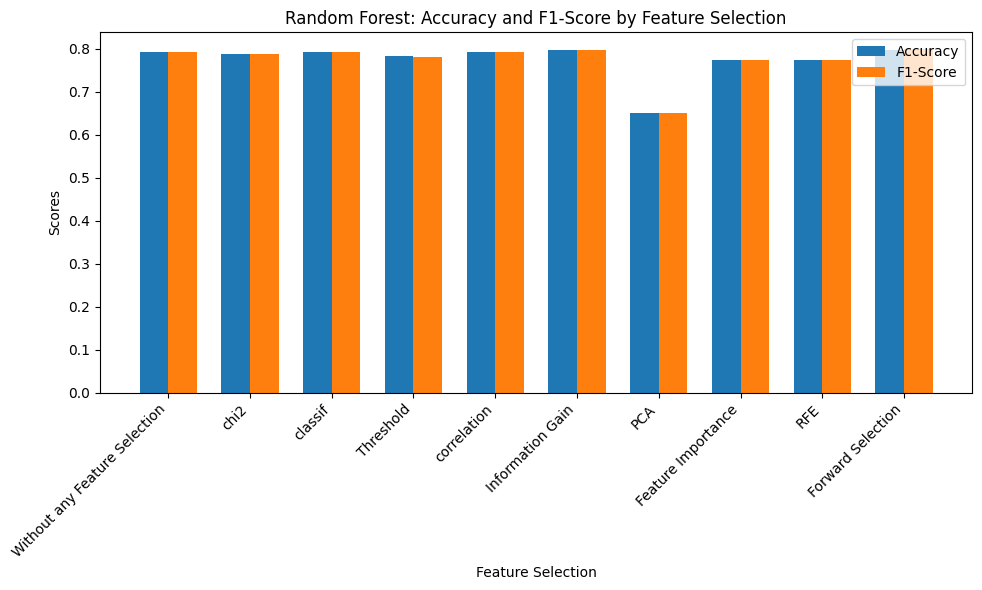

In [ ]:
#Random Forest
import matplotlib.pyplot as plt
import pandas as pd
model1_data = df[df['Model'] == 'Random Forest']

# Set the Feature_Selection column as the x-axis labels
x_labels = model1_data['Feature_Selection']

# Accuracy and F1-score values for Model1
accuracy_values = model1_data['Accuracy']
f1_score_values = model1_data['F1_Score']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(x_labels))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], f1_score_values, bar_width, label='F1-Score')

ax.set_xlabel('Feature Selection')
ax.set_ylabel('Scores')
ax.set_title('Random Forest: Accuracy and F1-Score by Feature Selection')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

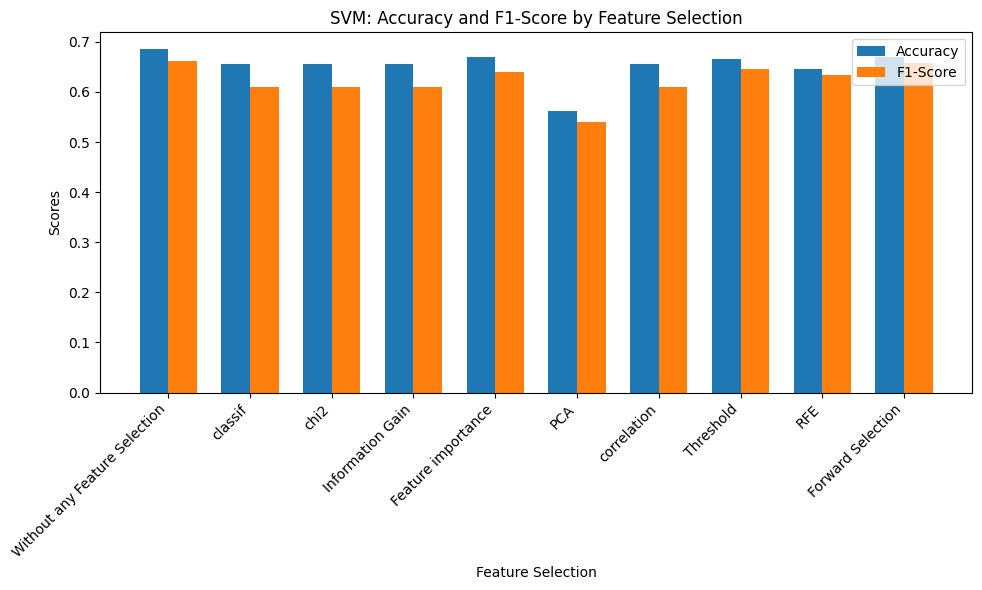

In [ ]:
#SVM
import matplotlib.pyplot as plt
import pandas as pd
model1_data = df[df['Model'] == 'SVM']

# Set the Feature_Selection column as the x-axis labels
x_labels = model1_data['Feature_Selection']

# Accuracy and F1-score values for Model1
accuracy_values = model1_data['Accuracy']
f1_score_values = model1_data['F1_Score']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(x_labels))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], f1_score_values, bar_width, label='F1-Score')

ax.set_xlabel('Feature Selection')
ax.set_ylabel('Scores')
ax.set_title('SVM: Accuracy and F1-Score by Feature Selection')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

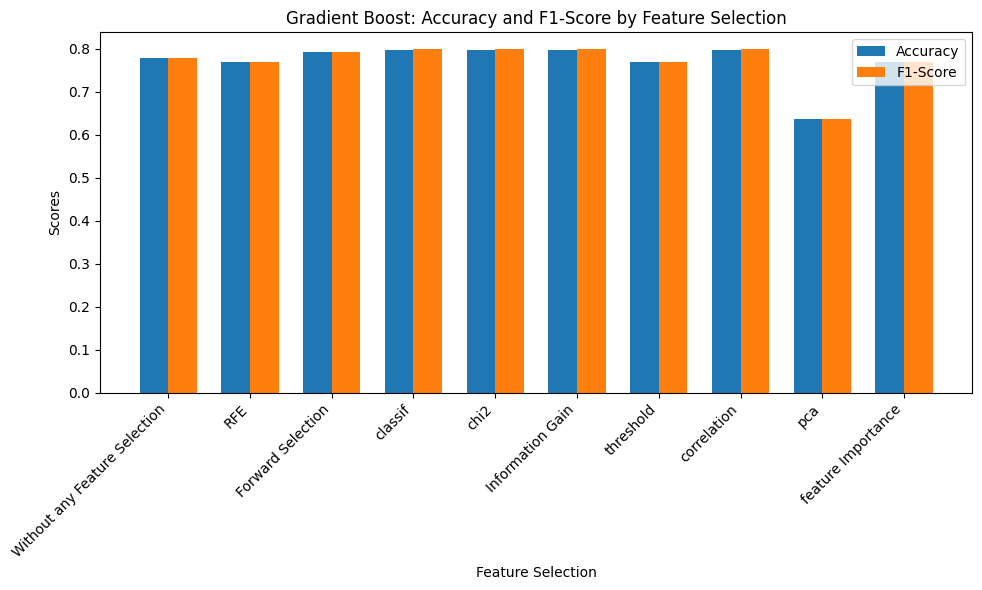

In [ ]:
#Gradient Boost
import matplotlib.pyplot as plt
import pandas as pd
model1_data = df[df['Model'] == 'Gradient Boost']

# Set the Feature_Selection column as the x-axis labels
x_labels = model1_data['Feature_Selection']

# Accuracy and F1-score values for Model1
accuracy_values = model1_data['Accuracy']
f1_score_values = model1_data['F1_Score']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(x_labels))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], f1_score_values, bar_width, label='F1-Score')

ax.set_xlabel('Feature Selection')
ax.set_ylabel('Scores')
ax.set_title('Gradient Boost: Accuracy and F1-Score by Feature Selection')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

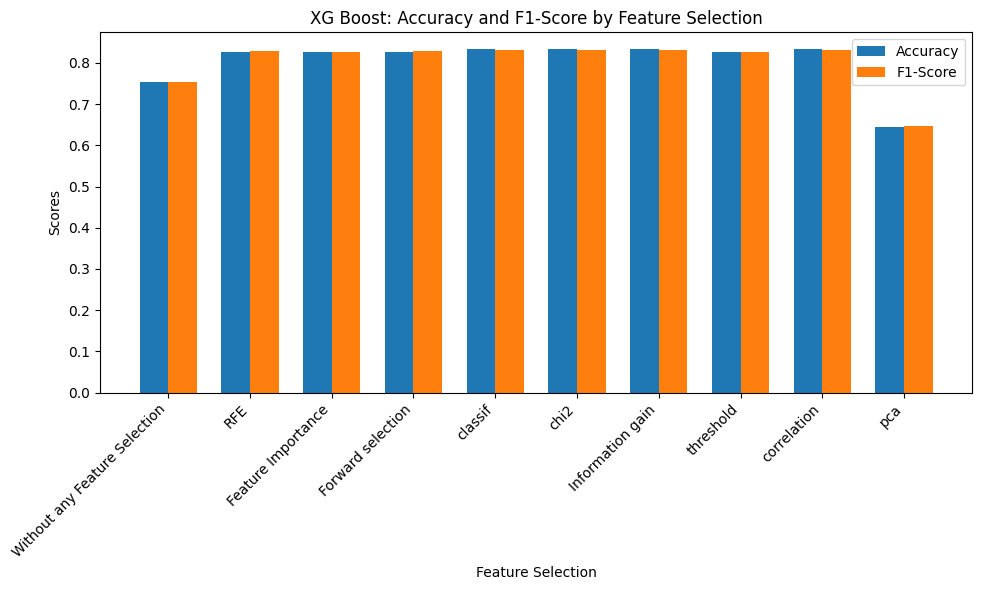

In [ ]:
#XG Boost
import matplotlib.pyplot as plt
import pandas as pd
model1_data = df[df['Model'] == 'XG Boost']

# Set the Feature_Selection column as the x-axis labels
x_labels = model1_data['Feature_Selection']

# Accuracy and F1-score values for Model1
accuracy_values = model1_data['Accuracy']
f1_score_values = model1_data['F1_Score']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(x_labels))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], f1_score_values, bar_width, label='F1-Score')

ax.set_xlabel('Feature Selection')
ax.set_ylabel('Scores')
ax.set_title('XG Boost: Accuracy and F1-Score by Feature Selection')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

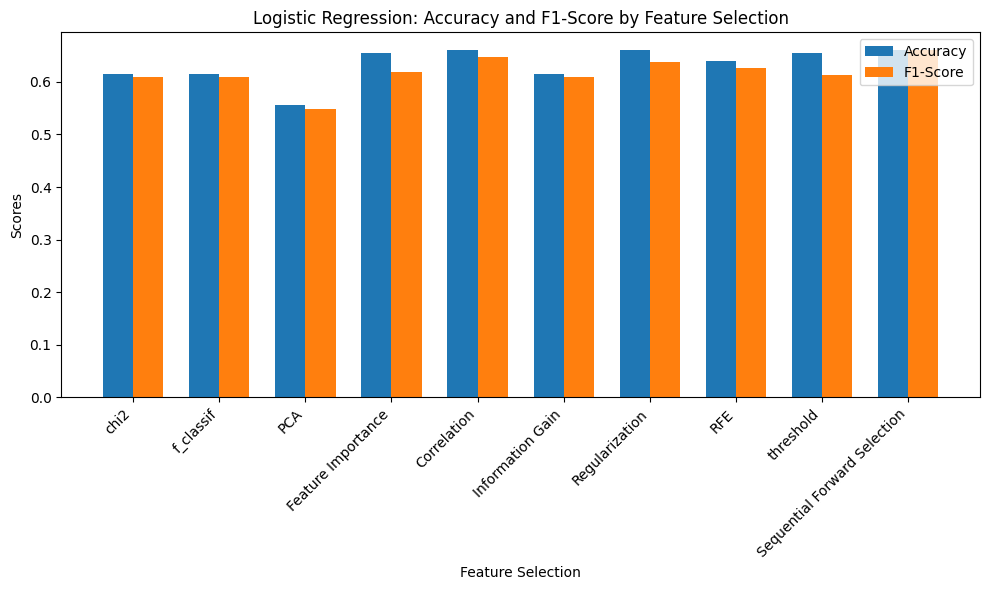

In [ ]:
#Logistic Regression
import matplotlib.pyplot as plt
import pandas as pd
model1_data = df[df['Model'] == 'Logistic Regression']

# Set the Feature_Selection column as the x-axis labels
x_labels = model1_data['Feature_Selection']

# Accuracy and F1-score values for Model1
accuracy_values = model1_data['Accuracy']
f1_score_values = model1_data['F1_Score']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(x_labels))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], f1_score_values, bar_width, label='F1-Score')

ax.set_xlabel('Feature Selection')
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression: Accuracy and F1-Score by Feature Selection')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


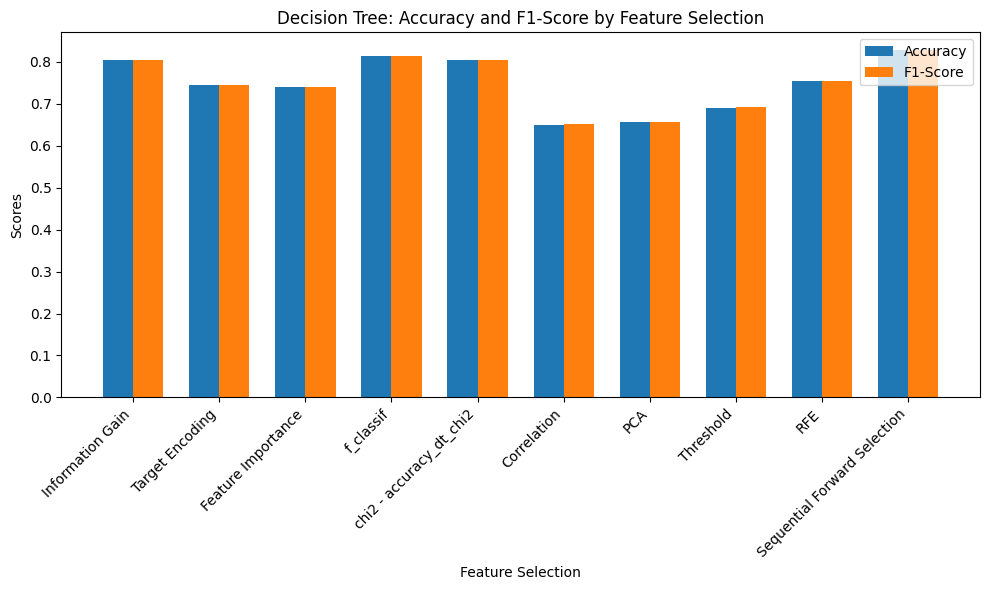

In [ ]:
#Decision Tree
import matplotlib.pyplot as plt
import pandas as pd
model1_data = df[df['Model'] == 'Decision Tree']

# Set the Feature_Selection column as the x-axis labels
x_labels = model1_data['Feature_Selection']

# Accuracy and F1-score values for Model1
accuracy_values = model1_data['Accuracy']
f1_score_values = model1_data['F1_Score']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(x_labels))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], f1_score_values, bar_width, label='F1-Score')

ax.set_xlabel('Feature Selection')
ax.set_ylabel('Scores')
ax.set_title('Decision Tree: Accuracy and F1-Score by Feature Selection')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


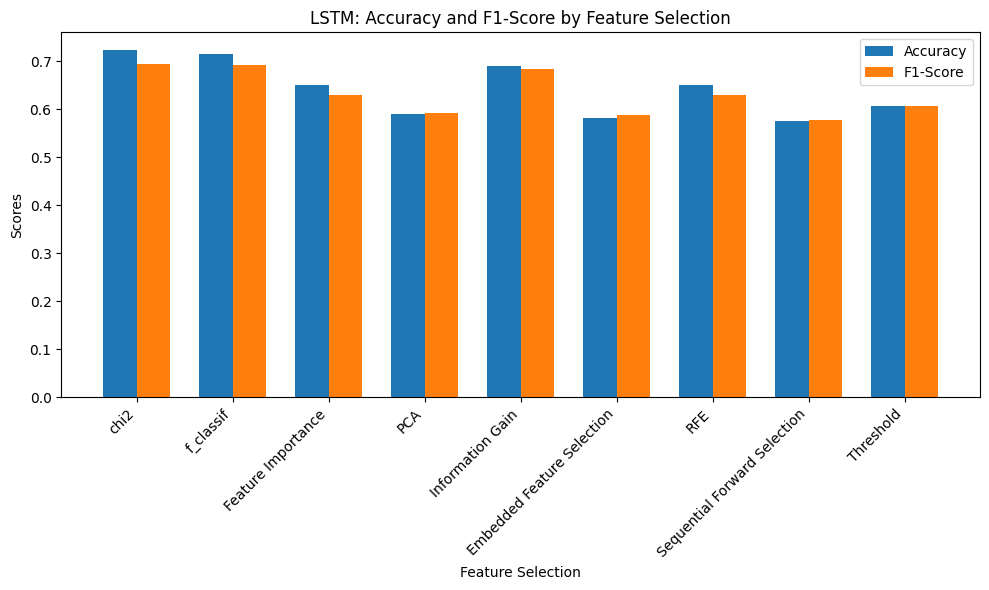

In [ ]:
#LSTM
import matplotlib.pyplot as plt
import pandas as pd
model1_data = df[df['Model'] == 'LSTM']

# Set the Feature_Selection column as the x-axis labels
x_labels = model1_data['Feature_Selection']

# Accuracy and F1-score values for Model1
accuracy_values = model1_data['Accuracy']
f1_score_values = model1_data['F1_Score']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(x_labels))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], f1_score_values, bar_width, label='F1-Score')

ax.set_xlabel('Feature Selection')
ax.set_ylabel('Scores')
ax.set_title('LSTM: Accuracy and F1-Score by Feature Selection')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

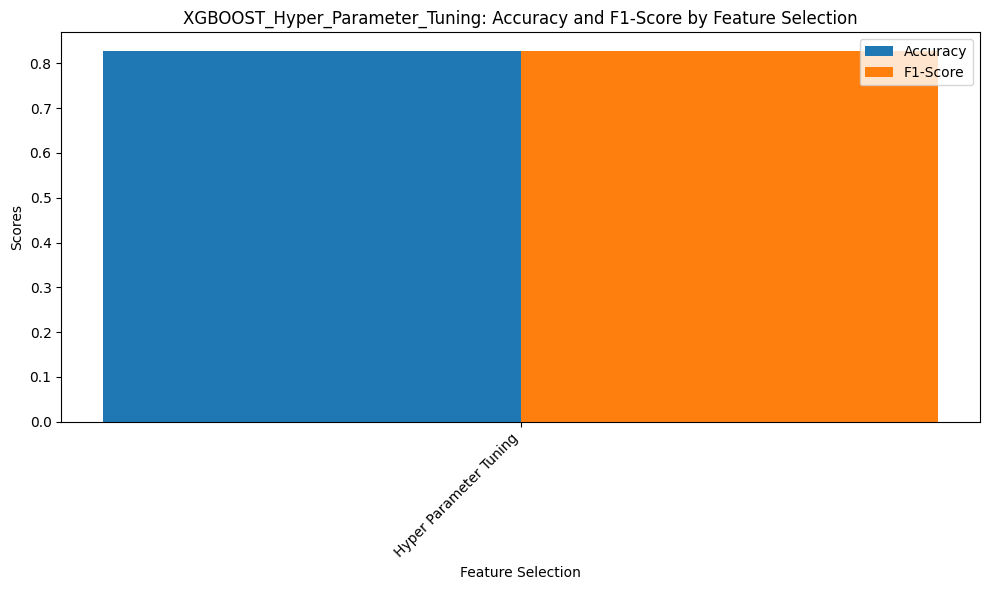

In [ ]:
# Hyper Parameter Tuning
import matplotlib.pyplot as plt
import pandas as pd
model1_data = df[df['Model'] == 'XGBOOST']

# Set the Feature_Selection column as the x-axis labels
x_labels = model1_data['Feature_Selection']

# Accuracy and F1-score values for Model1
accuracy_values = model1_data['Accuracy']
f1_score_values = model1_data['F1_Score']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(x_labels))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], f1_score_values, bar_width, label='F1-Score')

ax.set_xlabel('Feature Selection')
ax.set_ylabel('Scores')
ax.set_title('XGBOOST_Hyper_Parameter_Tuning: Accuracy and F1-Score by Feature Selection')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

# **V. Conclusion and Final Recommendations**





Out of all the different models tested such as Random Forest, SVM, Gradient Boost, XG Boost, with different feature selection techniques we found that the accuracy with XG boost using hyper parameter tuning tends to be higher upto 83%

In [ ]:
print("XGBoost Hyper Parameter Tuning Accuracy: ")
print(accuracy_xgb_final*100)

XGBoost Hyper Parameter Tuning Accuracy: 
82.75862068965517


1. **Dataset Size Impact**:Recognized the impact of a smaller dataset on LSTM model accuracy, attributing lower performance to increased complexity and data limitations.

2. **Strategic XGBoost Integration**: Introduced XGBoost strategically to address challenges posed by a smaller dataset, leveraging its balanced approach to enhance overall model performance.

3. **Feature Reduction for Enhancement**:Implemented a meticulous feature reduction process, refining the initial set of 9 features to a more streamlined and effective 5. This reduction aimed at improving not only model interpretability but also operational efficiency in maternal health risk assessment.

4. **Consistent Crucial Features**:Identified diastolic pressure, systolic pressure, and blood sugar as consistent and crucial features essential for accurate maternal health risk assessment. These features were deemed significant across various scenarios and proved to be reliable indicators.